<a href="https://colab.research.google.com/github/Kastratj/Final_project/blob/main/Tennis_Full_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pwlf

In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import os
import zipfile
import random
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, roc_curve, precision_score,
    recall_score, f1_score, log_loss, confusion_matrix, classification_report
)
from collections import defaultdict, Counter
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pwlf
import hmmlearn
from hmmlearn import hmm
from hmmlearn.hmm import CategoricalHMM
from hmmlearn.hmm import GaussianHMM
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
import re
import time
from tqdm import tqdm

In [ ]:
master_folder = files.upload()

Saving tennis_slam_pointbypoint-master.zip to tennis_slam_pointbypoint-master.zip


In [ ]:
with zipfile.ZipFile("tennis_slam_pointbypoint-master.zip", 'r') as zip_ref:
    zip_ref.extractall("master_all")

In [ ]:
point_aus_11_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2011-ausopen-points.csv")
point_aus_12_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2012-ausopen-points.csv")
point_aus_13_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2013-ausopen-points.csv")
point_aus_14_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2014-ausopen-points.csv")
point_aus_15_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2015-ausopen-points.csv")
point_aus_16_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2016-ausopen-points.csv")
point_aus_17_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2017-ausopen-points.csv")
point_aus_18_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2018-ausopen-points.csv")
point_aus_19_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2019-ausopen-points.csv")
point_aus_20_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2020-ausopen-points.csv")
point_aus_21_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2021-ausopen-points.csv")

point_fre_11_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2011-frenchopen-points.csv")
point_fre_12_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2012-frenchopen-points.csv")
point_fre_13_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2013-frenchopen-points.csv")
point_fre_14_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2014-frenchopen-points.csv")
point_fre_15_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2015-frenchopen-points.csv")
point_fre_16_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2016-frenchopen-points.csv")
point_fre_17_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2017-frenchopen-points.csv")
point_fre_18_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2018-frenchopen-points.csv")
point_fre_19_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2019-frenchopen-points.csv")
point_fre_20_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2020-frenchopen-points.csv")
point_fre_21_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2021-frenchopen-points.csv")

point_us_11_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2011-usopen-points.csv")
point_us_12_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2012-usopen-points.csv")
point_us_13_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2013-usopen-points.csv")
point_us_14_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2014-usopen-points.csv")
point_us_15_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2015-usopen-points.csv")
point_us_16_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2016-usopen-points.csv")
point_us_17_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2017-usopen-points.csv")
point_us_18_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2018-usopen-points.csv")
point_us_19_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2019-usopen-points.csv")
point_us_20_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2020-usopen-points.csv")
point_us_21_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2021-usopen-points.csv")

point_wim_11_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2011-wimbledon-points.csv")
point_wim_12_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2012-wimbledon-points.csv")
point_wim_13_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2013-wimbledon-points.csv")
point_wim_14_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2014-wimbledon-points.csv")
point_wim_15_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2015-wimbledon-points.csv")
point_wim_16_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2016-wimbledon-points.csv")
point_wim_17_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2017-wimbledon-points.csv")
point_wim_18_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2018-wimbledon-points.csv")
point_wim_19_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2019-wimbledon-points.csv")
point_wim_21_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2021-wimbledon-points.csv")
point_wim_22_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2022-wimbledon-points.csv")

point_all_11_df = [point_aus_11_df, point_fre_11_df, point_wim_11_df, point_us_11_df]
point_all_12_df = [point_aus_12_df, point_fre_12_df, point_wim_12_df, point_us_12_df]
point_all_13_df = [point_aus_13_df, point_fre_13_df, point_wim_13_df, point_us_13_df]
point_all_14_df = [point_aus_14_df, point_fre_14_df, point_wim_14_df, point_us_14_df]
point_all_15_df = [point_aus_15_df, point_fre_15_df, point_wim_15_df, point_us_15_df]
point_all_16_df = [point_aus_16_df, point_fre_16_df, point_wim_16_df, point_us_16_df]
point_all_17_df = [point_aus_17_df, point_fre_17_df, point_wim_17_df, point_us_17_df]
point_all_18_df = [point_aus_18_df, point_fre_18_df, point_wim_18_df, point_us_18_df]
point_all_19_df = [point_aus_19_df, point_fre_19_df, point_wim_19_df, point_us_19_df]
point_all_20_df = [point_aus_20_df, point_fre_20_df, point_wim_21_df, point_us_20_df]
point_all_21_df = [point_aus_21_df, point_fre_21_df, point_wim_22_df, point_us_21_df]

all_point_dfs = (
    point_all_11_df + point_all_12_df + point_all_13_df + point_all_14_df +
    point_all_15_df + point_all_16_df + point_all_17_df + point_all_18_df +
    point_all_19_df + point_all_20_df + point_all_21_df
)


point_df_all = pd.concat(all_point_dfs, ignore_index=True)

point_df_all.rename(columns={point_df_all.columns[0]: "match_id"}, inplace=True)
# Extract match number from match_id
point_df_all['match_num_str'] = point_df_all['match_id'].str.extract(r'-(\d+)$')[0]

# Drop rows where match_num couldn't be extracted (bad format)
point_df_all = point_df_all.dropna(subset=['match_num_str'])



/tmp/ipython-input-761573555.py:44: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  point_wim_18_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2018-wimbledon-points.csv")


In [ ]:
point_df_fem = point_df_all[point_df_all['match_num_str'].str.startswith('2')].copy()

In [ ]:
point_df_all = point_df_all[point_df_all['match_num_str'].str.startswith('1')].copy()

In [ ]:
match_aus_11_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2011-ausopen-matches.csv")
match_aus_12_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2012-ausopen-matches.csv")
match_aus_13_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2013-ausopen-matches.csv")
match_aus_14_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2014-ausopen-matches.csv")
match_aus_15_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2015-ausopen-matches.csv")
match_aus_16_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2016-ausopen-matches.csv")
match_aus_17_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2017-ausopen-matches.csv")
match_aus_18_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2018-ausopen-matches.csv")
match_aus_19_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2019-ausopen-matches.csv")
match_aus_20_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2020-ausopen-matches.csv")
match_aus_21_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2021-ausopen-matches.csv")

match_fre_11_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2011-frenchopen-matches.csv")
match_fre_12_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2012-frenchopen-matches.csv")
match_fre_13_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2013-frenchopen-matches.csv")
match_fre_14_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2014-frenchopen-matches.csv")
match_fre_15_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2015-frenchopen-matches.csv")
match_fre_16_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2016-frenchopen-matches.csv")
match_fre_17_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2017-frenchopen-matches.csv")
match_fre_18_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2018-frenchopen-matches.csv")
match_fre_19_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2019-frenchopen-matches.csv")
match_fre_20_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2020-frenchopen-matches.csv")
match_fre_21_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2021-frenchopen-matches.csv")

match_us_11_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2011-usopen-matches.csv")
match_us_12_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2012-usopen-matches.csv")
match_us_13_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2013-usopen-matches.csv")
match_us_14_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2014-usopen-matches.csv")
match_us_15_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2015-usopen-matches.csv")
match_us_16_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2016-usopen-matches.csv")
match_us_17_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2017-usopen-matches.csv")
match_us_18_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2018-usopen-matches.csv")
match_us_19_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2019-usopen-matches.csv")
match_us_20_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2020-usopen-matches.csv")
match_us_21_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2021-usopen-matches.csv")

match_wim_11_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2011-wimbledon-matches.csv")
match_wim_12_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2012-wimbledon-matches.csv")
match_wim_13_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2013-wimbledon-matches.csv")
match_wim_14_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2014-wimbledon-matches.csv")
match_wim_15_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2015-wimbledon-matches.csv")
match_wim_16_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2016-wimbledon-matches.csv")
match_wim_17_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2017-wimbledon-matches.csv")
match_wim_18_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2018-wimbledon-matches.csv")
match_wim_19_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2019-wimbledon-matches.csv")
match_wim_21_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2021-wimbledon-matches.csv")
match_wim_22_df = pd.read_csv("master_all/tennis_slam_pointbypoint-master/2022-wimbledon-matches.csv")

match_all_11_df = [match_aus_11_df, match_fre_11_df, match_wim_11_df, match_us_11_df]
match_all_12_df = [match_aus_12_df, match_fre_12_df, match_wim_12_df, match_us_12_df]
match_all_13_df = [match_aus_13_df, match_fre_13_df, match_wim_13_df, match_us_13_df]
match_all_14_df = [match_aus_14_df, match_fre_14_df, match_wim_14_df, match_us_14_df]
match_all_15_df = [match_aus_15_df, match_fre_15_df, match_wim_15_df, match_us_15_df]
match_all_16_df = [match_aus_16_df, match_fre_16_df, match_wim_16_df, match_us_16_df]
match_all_17_df = [match_aus_17_df, match_fre_17_df, match_wim_17_df, match_us_17_df]
match_all_18_df = [match_aus_18_df, match_fre_18_df, match_wim_18_df, match_us_18_df]
match_all_19_df = [match_aus_19_df, match_fre_19_df, match_wim_19_df, match_us_19_df]
match_all_20_df = [match_aus_20_df, match_fre_20_df, match_wim_21_df, match_us_20_df]
match_all_21_df = [match_aus_21_df, match_fre_21_df, match_wim_22_df, match_us_21_df]

all_match_dfs = (
    match_all_11_df + match_all_12_df + match_all_13_df + match_all_14_df +
    match_all_15_df + match_all_16_df + match_all_17_df + match_all_18_df +
    match_all_19_df + match_all_20_df + match_all_21_df
)

match_df_all = pd.concat(all_match_dfs, ignore_index=True)

# Extract match number from match_id
match_df_all['match_num_str'] = match_df_all['match_id'].str.extract(r'-(\d+)$')[0]

# Drop rows where match_num couldn't be extracted (bad format)
match_df_all = match_df_all.dropna(subset=['match_num_str'])



In [ ]:
match_df_fem = match_df_all[match_df_all['match_num_str'].str.startswith('2')].copy()

In [ ]:
# Keep only rows where match number starts with '1' (men’s matches)
match_df_all = match_df_all[match_df_all['match_num_str'].str.startswith('1')].copy()


In [ ]:
def build_surname_map(match_df):
    """
    Build a mapping from surname -> full first name
    using the match dataset.
    """
    surname_map = {}
    for name in pd.concat([match_df['player1'], match_df['player2']]).dropna().unique():
        parts = str(name).title().split()
        if len(parts) >= 2:
            surname = parts[-1]
            first = parts[0]
            if len(first) > 1:  # skip initials
                surname_map[surname] = first
    return surname_map


def standardize_player_name(name, surname_map=None):
    """
    Standardize player names:
    - Normalize punctuation & spaces
    - Fix ordering ("Last, F" -> "F Last")
    - Expand initials to full names if possible
    - Preserve multi-word names
    """
    if pd.isna(name) or name.strip() == '':
        return None

    # Normalize punctuation and spacing
    name = str(name).strip()
    name = name.replace('.', ' ')
    name = re.sub(r'\s+', ' ', name)
    name = name.title()

    # Patterns from your original code
    patterns = [
        # "First Last"
        r'^([A-Z][a-z]+(?:\s[A-Z][a-z]+)*)\s+([A-Z][a-z]+(?:\s[A-Z][a-z]+)*)$',
        # "F Last"
        r'^([A-Z])\s+([A-Z][a-z]+(?:\s[A-Z][a-z]+)*)$',
        # "Last F" or "Last, F"
        r'^([A-Z][a-z]+(?:\s[A-Z][a-z]+)*),?\s+([A-Z])$',
        # "Last First"
        r'^([A-Z][a-z]+(?:\s[A-Z][a-z]+)*)\s+([A-Z][a-z]+)$'
    ]

    for i, pattern in enumerate(patterns):
        match = re.match(pattern, name)
        if match:
            part1, part2 = match.groups()
            if i == 0:  # First Last
                first, last = part1, part2
            elif i == 1:  # F Last
                first, last = part1, part2
            elif i == 2:  # Last F
                first, last = part2, part1
            else:  # Last First
                first, last = part1, part2

            # Expand initials if possible
            if len(first) == 1 and surname_map is not None:
                if last in surname_map:
                    first = surname_map[last]

            return f"{first} {last}"

    return name  # fallback if no pattern matched

In [ ]:
# Step 1: Build surname map from match_df_all
surname_map = build_surname_map(match_df_all)

# Step 2: Apply standardization to match_df_all
match_df_all['player1'] = match_df_all['player1'].apply(lambda x: standardize_player_name(x, surname_map))
match_df_all['player2'] = match_df_all['player2'].apply(lambda x: standardize_player_name(x, surname_map))

In [ ]:
points_merged = point_df_all.merge(
    match_df_all[['match_id', 'player1', 'player2']],
    on='match_id',
    how='left'
)

# Create actual server name column
points_merged['server_name'] = points_merged.apply(
    lambda row: row['player1'] if row['PointServer'] == 1 else row['player2'],
    axis=1
)

# Fill missing Speed_KMH and Rally using per-player medians
for col in ['Speed_KMH', 'Rally']:
    # Calculate per-player median ignoring NaNs
    medians = points_merged.groupby('server_name')[col].transform('median')

    # Fill missing with that median
    points_merged[col] = points_merged[col].fillna(medians)

# Optional: check if any NaNs remain
print(points_merged[['Speed_KMH', 'Rally']].isna().sum())

Speed_KMH      2492
Rally        527120
dtype: int64


# Logistic Regression Simple

In [ ]:
match_df_all_safe = match_df_all.copy()

In [ ]:
match_df_all = match_df_all_safe.copy()

In [ ]:
def infer_match_winner_from_points(match_data):
    if 'SetWinner' in match_data.columns:
        set_winners = match_data.groupby('SetNo')['SetWinner'].first()
        p1_sets = (set_winners == 1).sum()
        p2_sets = (set_winners == 2).sum()

        if p1_sets > p2_sets:
            return 1
        elif p2_sets > p1_sets:
            return 2

    # Fallback: check games won in the final point of the match
    final_point = match_data.iloc[-1]
    if final_point['P1GamesWon'] > final_point['P2GamesWon']:
        return 1
    elif final_point['P2GamesWon'] > final_point['P1GamesWon']:
        return 2

    return None

In [ ]:
match_winners = point_df_all.groupby('match_id').apply(infer_match_winner_from_points).reset_index()
match_winners.columns = ['match_id', 'winner_true']

/tmp/ipython-input-3372969865.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  match_winners = point_df_all.groupby('match_id').apply(infer_match_winner_from_points).reset_index()


In [ ]:
match_df_all = match_df_all.merge(match_winners, on='match_id', how='left')

In [ ]:
print(match_winners.head())
print(match_winners.columns)

            match_id  winner_true
0  2011-ausopen-1101          1.0
1  2011-ausopen-1103          1.0
2  2011-ausopen-1105          1.0
3  2011-ausopen-1108          2.0
4  2011-ausopen-1112          2.0
Index(['match_id', 'winner_true'], dtype='object')


In [ ]:
print(match_df_all.columns)

Index(['match_id', 'year', 'slam', 'match_num', 'player1', 'player2', 'status',
       'winner', 'event_name', 'round', 'court_name', 'court_id', 'player1id',
       'player2id', 'nation1', 'nation2', 'match_num_str', 'winner_true'],
      dtype='object')


In [ ]:
print(match_df_all['match_id'].dtype)
print(match_winners['match_id'].dtype)

object
object


In [ ]:
match_df_all = match_df_all.dropna(subset=['winner_true'])

In [ ]:
match_df_all['winner_binary'] = match_df_all['winner_true'].apply(lambda x: 1 if x == 1 else 0)


# Log final

In [ ]:
# Progressive Match Features - Calculate stats up to each match point
import pandas as pd
import numpy as np
from collections import defaultdict

matches_df = match_df_all.copy()
points_df = point_df_all.copy()

def calculate_progressive_match_features(matches_df, points_df):
    """
    Calculate match features where each player's stats only include their performance
    from matches prior to the current match (no data leakage from future matches)
    """

    # Sort matches chronologically to process them in order
    matches_sorted = matches_df.sort_values(['year', 'slam', 'match_id']).reset_index(drop=True)

    # Initialize progressive stats tracking
    player_progressive_stats = defaultdict(lambda: {
        'total_matches': 0,
        'wins': 0,
        'losses': 0,
        'win_rate': 0.5,
        'total_points_played': 0,
        'points_won': 0,
        'point_win_rate': 0.5,
        'serve_points_played': 0,
        'serve_points_won': 0,
        'serve_win_rate': 0.5,
        'avg_serve_speed': 0,
        'return_points_played': 0,
        'return_points_won': 0,
        'return_win_rate': 0.5,
        'avg_rally_on_serve': 0,
        'avg_rally_on_return': 0,
        'avg_rally_length': 0,
        'long_rally_rate': 0,
        'avg_momentum': 0,
        'tournaments_played': 0,
        'avg_wins_per_tournament': 0,

        # Running totals for averages
        '_total_serve_speed': 0,
        '_total_rally_serve': 0,
        '_total_rally_return': 0,
        '_total_rally_length': 0,
        '_long_rallies': 0,
        '_total_momentum': 0,
        '_momentum_points': 0,
        '_tournament_history': []  # List of (year, slam, wins) tuples
    })

    match_features = []

    print(f"Processing {len(matches_sorted)} matches chronologically...")

    for idx, match in matches_sorted.iterrows():
        if idx % 100 == 0:
            print(f"Processing match {idx+1}/{len(matches_sorted)}")

        player1 = match['player1']
        player2 = match['player2']
        match_id = match['match_id']

        # Get current progressive stats for both players (before this match)
        p1_stats = dict(player_progressive_stats[player1])
        p2_stats = dict(player_progressive_stats[player2])

        # Clean up internal tracking variables for output
        for stats in [p1_stats, p2_stats]:
            for key in list(stats.keys()):
                if key.startswith('_'):
                    del stats[key]

        # Create match features using historical stats only
        features = {
            'match_id': match_id,
            'player1': player1,
            'player2': player2,
            'year': match['year'],
            'slam': match['slam'],
            'winner_true': match['winner_true'],
            'status': match['status']
        }

        # Add individual player stats
        stat_columns = ['total_matches', 'wins', 'losses', 'win_rate', 'total_points_played',
                       'points_won', 'point_win_rate', 'serve_win_rate', 'return_win_rate',
                       'avg_serve_speed', 'avg_rally_length', 'long_rally_rate', 'avg_momentum',
                       'tournaments_played', 'avg_wins_per_tournament']

        for stat in stat_columns:
            features[f'p1_{stat}'] = p1_stats.get(stat, 0)
            features[f'p2_{stat}'] = p2_stats.get(stat, 0)

        # Comparative features
        for stat in ['win_rate', 'point_win_rate', 'serve_win_rate', 'return_win_rate']:
            p1_val = p1_stats.get(stat, 0)
            p2_val = p2_stats.get(stat, 0)

            features[f'{stat}_diff'] = p1_val - p2_val

            if p2_val > 0:
                features[f'{stat}_ratio'] = p1_val / p2_val
            else:
                features[f'{stat}_ratio'] = p1_val if p1_val > 0 else 1

        # Experience and style differences
        features['experience_diff'] = p1_stats.get('total_matches', 0) - p2_stats.get('total_matches', 0)
        features['serve_speed_diff'] = p1_stats.get('avg_serve_speed', 0) - p2_stats.get('avg_serve_speed', 0)
        features['rally_style_diff'] = p1_stats.get('avg_rally_length', 0) - p2_stats.get('avg_rally_length', 0)
        features['h2h_available'] = 0  # Placeholder

        # Create target variable
        features['target'] = 1 if match['winner_true'] == 1 else 0

        match_features.append(features)

        # Now update progressive stats for both players based on this match's results
        update_player_progressive_stats(player1, player2, match, points_df, player_progressive_stats)

    return pd.DataFrame(match_features)


def update_player_progressive_stats(player1, player2, match, points_df, player_progressive_stats):
    """
    Update progressive statistics for both players after a match
    """
    match_id = match['match_id']
    winner = match['winner_true']

    # Get point-by-point data for this match
    match_points = points_df[points_df['match_id'] == match_id].copy()

    # Update stats for both players
    for player_pos, player in [(1, player1), (2, player2)]:
        stats = player_progressive_stats[player]

        # Update match record
        stats['total_matches'] += 1
        if winner == player_pos:
            stats['wins'] += 1
        else:
            stats['losses'] += 1

        stats['win_rate'] = stats['wins'] / stats['total_matches']

        # Update tournament tracking
        tournament_key = (match['year'], match['slam'])
        tournament_history = stats['_tournament_history']

        # Find if this tournament already exists in history
        tournament_found = False
        for i, (year, slam, wins) in enumerate(tournament_history):
            if year == tournament_key[0] and slam == tournament_key[1]:
                # Update existing tournament record
                if winner == player_pos:
                    tournament_history[i] = (year, slam, wins + 1)
                tournament_found = True
                break

        if not tournament_found:
            # Add new tournament
            wins_in_tournament = 1 if winner == player_pos else 0
            tournament_history.append((tournament_key[0], tournament_key[1], wins_in_tournament))

        # Update tournament stats
        stats['tournaments_played'] = len(tournament_history)
        if len(tournament_history) > 0:
            total_wins = sum(wins for _, _, wins in tournament_history)
            stats['avg_wins_per_tournament'] = total_wins / len(tournament_history)

        # Update point-level statistics if available
        if len(match_points) > 0:
            player_points = match_points.copy()
            player_points['player_won_point'] = (player_points['PointWinner'] == player_pos).astype(int)
            player_points['player_served'] = (player_points['PointServer'] == player_pos).astype(int)
            player_points['opponent_served'] = (player_points['PointServer'] != player_pos).astype(int)

            # Overall point stats
            points_in_match = len(player_points)
            points_won_in_match = player_points['player_won_point'].sum()

            stats['total_points_played'] += points_in_match
            stats['points_won'] += points_won_in_match
            stats['point_win_rate'] = stats['points_won'] / stats['total_points_played']

            # Service stats
            serve_points = player_points[player_points['player_served'] == 1]
            if len(serve_points) > 0:
                serve_points_count = len(serve_points)
                serve_points_won = serve_points['player_won_point'].sum()

                stats['serve_points_played'] += serve_points_count
                stats['serve_points_won'] += serve_points_won
                stats['serve_win_rate'] = stats['serve_points_won'] / stats['serve_points_played']

                # Serve speed
                serve_speeds = serve_points['Speed_KMH'].dropna()
                if len(serve_speeds) > 0:
                    stats['_total_serve_speed'] += serve_speeds.sum()
                    total_serves_with_speed = stats['serve_points_played']  # Approximation
                    if total_serves_with_speed > 0:
                        stats['avg_serve_speed'] = stats['_total_serve_speed'] / total_serves_with_speed

                # Rally on serve
                rally_on_serve = serve_points['Rally'].dropna()
                if len(rally_on_serve) > 0:
                    stats['_total_rally_serve'] += rally_on_serve.sum()
                    stats['avg_rally_on_serve'] = stats['_total_rally_serve'] / stats['serve_points_played']

            # Return stats
            return_points = player_points[player_points['opponent_served'] == 1]
            if len(return_points) > 0:
                return_points_count = len(return_points)
                return_points_won = return_points['player_won_point'].sum()

                stats['return_points_played'] += return_points_count
                stats['return_points_won'] += return_points_won
                stats['return_win_rate'] = stats['return_points_won'] / stats['return_points_played']

                # Rally on return
                rally_on_return = return_points['Rally'].dropna()
                if len(rally_on_return) > 0:
                    stats['_total_rally_return'] += rally_on_return.sum()
                    stats['avg_rally_on_return'] = stats['_total_rally_return'] / stats['return_points_played']

            # Overall rally stats
            all_rallies = player_points['Rally'].dropna()
            if len(all_rallies) > 0:
                stats['_total_rally_length'] += all_rallies.sum()
                stats['avg_rally_length'] = stats['_total_rally_length'] / stats['total_points_played']

                long_rallies_in_match = (all_rallies > 10).sum()
                stats['_long_rallies'] += long_rallies_in_match
                stats['long_rally_rate'] = stats['_long_rallies'] / stats['total_points_played']

            # Momentum stats (if available)
            if 'P1Momentum' in player_points.columns:
                momentum_col = f'P{player_pos}Momentum'
                if momentum_col in player_points.columns:
                    momentum_values = player_points[momentum_col].dropna()
                    if len(momentum_values) > 0:
                        stats['_total_momentum'] += momentum_values.sum()
                        stats['_momentum_points'] += len(momentum_values)
                        stats['avg_momentum'] = stats['_total_momentum'] / stats['_momentum_points']


# Usage example - call this function with your actual DataFrames:
def run_progressive_analysis(matches_df, points_df):
    """
    Wrapper function to run the progressive analysis and display results
    """
    print("Calculating progressive match features...")
    progressive_features_df = calculate_progressive_match_features(matches_df, points_df)

    # Filter to complete matches only
    complete_progressive_df = progressive_features_df[
        progressive_features_df['status'] == 'Complete'
    ].copy()

    print(f"Progressive match features DataFrame shape: {progressive_features_df.shape}")
    print(f"Complete matches for modeling: {len(complete_progressive_df)}")
    print(f"\nTarget distribution:")
    print(complete_progressive_df['target'].value_counts())
    print(f"\nSample progressive match features:")
    print(complete_progressive_df.head(3))

    # Compare with original approach to verify no data leakage
    print(f"\nFirst few matches should have minimal/zero historical stats:")
    print(complete_progressive_df[['player1', 'player2', 'p1_total_matches', 'p2_total_matches',
                                  'p1_win_rate', 'p2_win_rate']].head(10))

    return progressive_features_df, complete_progressive_df

# To use this code, call:
# progressive_features_df, complete_progressive_df = run_progressive_analysis(your_matches_df, your_points_df)

In [ ]:
progressive_features_df, complete_progressive_df = run_progressive_analysis(matches_df, points_df)

Calculating progressive match features...
Processing 3671 matches chronologically...
Processing match 1/3671
Processing match 101/3671
Processing match 201/3671
Processing match 301/3671
Processing match 401/3671
Processing match 501/3671
Processing match 601/3671
Processing match 701/3671
Processing match 801/3671
Processing match 901/3671
Processing match 1001/3671
Processing match 1101/3671
Processing match 1201/3671
Processing match 1301/3671
Processing match 1401/3671
Processing match 1501/3671
Processing match 1601/3671
Processing match 1701/3671
Processing match 1801/3671
Processing match 1901/3671
Processing match 2001/3671
Processing match 2101/3671
Processing match 2201/3671
Processing match 2301/3671
Processing match 2401/3671
Processing match 2501/3671
Processing match 2601/3671
Processing match 2701/3671
Processing match 2801/3671
Processing match 2901/3671
Processing match 3001/3671
Processing match 3101/3671
Processing match 3201/3671
Processing match 3301/3671
Processin

In [ ]:
# Prepare data for modeling
model_df = progressive_features_df.copy()

# Debug: Check what columns we actually have
print("Available columns in model_df:")
print(model_df.columns.tolist())
print(f"Model_df shape: {model_df.shape}")

# Select only the predictive features (exclude identifiers and target)
exclude_cols = ['match_id', 'player1', 'player2', 'winner_true','winner','winner_binary', 'status', 'target']
# Only exclude columns that actually exist
exclude_cols = [col for col in exclude_cols if col in model_df.columns]
feature_columns = [col for col in model_df.columns if col not in exclude_cols]

print(f"Excluding columns: {exclude_cols}")
print(f"Feature columns found: {len(feature_columns)}")

print(f"Available feature columns: {len(feature_columns)}")
print("Feature columns:")
for i, col in enumerate(feature_columns, 1):
    print(f"{i:2d}. {col}")

# Handle categorical variables before creating X
model_df_processed = model_df.copy()

# Encode categorical variables
categorical_columns = []
for col in feature_columns:
    if model_df_processed[col].dtype == 'object':
        categorical_columns.append(col)
        print(f"Encoding categorical column: {col}")
        # Use label encoding for categorical variables
        unique_values = model_df_processed[col].unique()
        value_map = {val: idx for idx, val in enumerate(unique_values)}
        model_df_processed[col] = model_df_processed[col].map(value_map)

print(f"Encoded categorical columns: {categorical_columns}")

# Prepare X and y
X = model_df_processed[feature_columns].copy()
y = model_df_processed['target'].copy()

print(f"\nDataset for modeling:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Target distribution:")
print(y.value_counts(normalize=True))

# Handle any missing values
print(f"\nMissing values per column:")
missing_counts = X.isnull().sum()
if missing_counts.sum() > 0:
    print(missing_counts[missing_counts > 0])
    # Fill missing values with 0 for now
    X = X.fillna(0)
    print("Missing values filled with 0")
else:
    print("No missing values found")

# Check for constant features
print(f"\nFeature variance check:")
feature_vars = X.var()
zero_var_features = feature_vars[feature_vars == 0].index.tolist()
if zero_var_features:
    print(f"Features with zero variance (will be removed): {zero_var_features}")
    X = X.drop(columns=zero_var_features)
    feature_columns = [col for col in feature_columns if col not in zero_var_features]
else:
    print("All features have non-zero variance")

print(f"\nFinal feature set: {X.shape[1]} features")

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Also keep track of match info for the test set for later prediction function
test_match_info = model_df.loc[X_test.index, ['match_id', 'player1', 'player2']].copy()

print(f"\nTrain-test split completed:")
print(f"Training: {X_train.shape[0]} matches")
print(f"Testing: {X_test.shape[0]} matches")
print(f"Training class distribution: {y_train.value_counts(normalize=True).to_dict()}")
print(f"Testing class distribution: {y_test.value_counts(normalize=True).to_dict()}")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeature scaling completed")
print(f"Training set - Mean: {X_train_scaled.mean():.6f}, Std: {X_train_scaled.std():.6f}")
print(f"Test set - Mean: {X_test_scaled.mean():.6f}, Std: {X_test_scaled.std():.6f}")

Available columns in model_df:
['match_id', 'player1', 'player2', 'year', 'slam', 'winner_true', 'status', 'p1_total_matches', 'p2_total_matches', 'p1_wins', 'p2_wins', 'p1_losses', 'p2_losses', 'p1_win_rate', 'p2_win_rate', 'p1_total_points_played', 'p2_total_points_played', 'p1_points_won', 'p2_points_won', 'p1_point_win_rate', 'p2_point_win_rate', 'p1_serve_win_rate', 'p2_serve_win_rate', 'p1_return_win_rate', 'p2_return_win_rate', 'p1_avg_serve_speed', 'p2_avg_serve_speed', 'p1_avg_rally_length', 'p2_avg_rally_length', 'p1_long_rally_rate', 'p2_long_rally_rate', 'p1_avg_momentum', 'p2_avg_momentum', 'p1_tournaments_played', 'p2_tournaments_played', 'p1_avg_wins_per_tournament', 'p2_avg_wins_per_tournament', 'win_rate_diff', 'win_rate_ratio', 'point_win_rate_diff', 'point_win_rate_ratio', 'serve_win_rate_diff', 'serve_win_rate_ratio', 'return_win_rate_diff', 'return_win_rate_ratio', 'experience_diff', 'serve_speed_diff', 'rally_style_diff', 'h2h_available', 'target']
Model_df shape:

In [ ]:
# Train Logistic Regression model
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='liblinear'  # Good for small datasets
)

print("Training Logistic Regression model...")
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Get prediction probabilities
y_train_pred_proba = lr_model.predict_proba(X_train_scaled)[:, 1]
y_test_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

print("Model training completed!")

# Training accuracy
train_accuracy = lr_model.score(X_train_scaled, y_train)
test_accuracy = lr_model.score(X_test_scaled, y_test)

print(f"\nModel Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# AUC scores
train_auc = roc_auc_score(y_train, y_train_pred_proba)
test_auc = roc_auc_score(y_test, y_test_pred_proba)

print(f"Training AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

print(f"\nModel coefficients shape: {lr_model.coef_.shape}")
print(f"Model intercept: {lr_model.intercept_[0]:.4f}")

Training Logistic Regression model...
Model training completed!

Model Performance:
Training Accuracy: 0.7330
Test Accuracy: 0.7184
Training AUC: 0.8105
Test AUC: 0.7917

Model coefficients shape: (1, 43)
Model intercept: 0.0786


=== TRAINING SET PERFORMANCE ===
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1432
           1       0.73      0.76      0.74      1504

    accuracy                           0.73      2936
   macro avg       0.73      0.73      0.73      2936
weighted avg       0.73      0.73      0.73      2936


=== TEST SET PERFORMANCE ===
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       358
           1       0.71      0.76      0.73       377

    accuracy                           0.72       735
   macro avg       0.72      0.72      0.72       735
weighted avg       0.72      0.72      0.72       735


=== CONFUSION MATRICES ===
Training Set Confusion Matrix:
[[1016  416]
 [ 368 1136]]

Test Set Confusion Matrix:
[[243 115]
 [ 92 285]]

=== TOP 15 MOST IMPORTANT FEATURES ===
                   feature  coefficient
p1_avg_wins_per_tournament     1.158012
p2_avg_wins_per_tournament

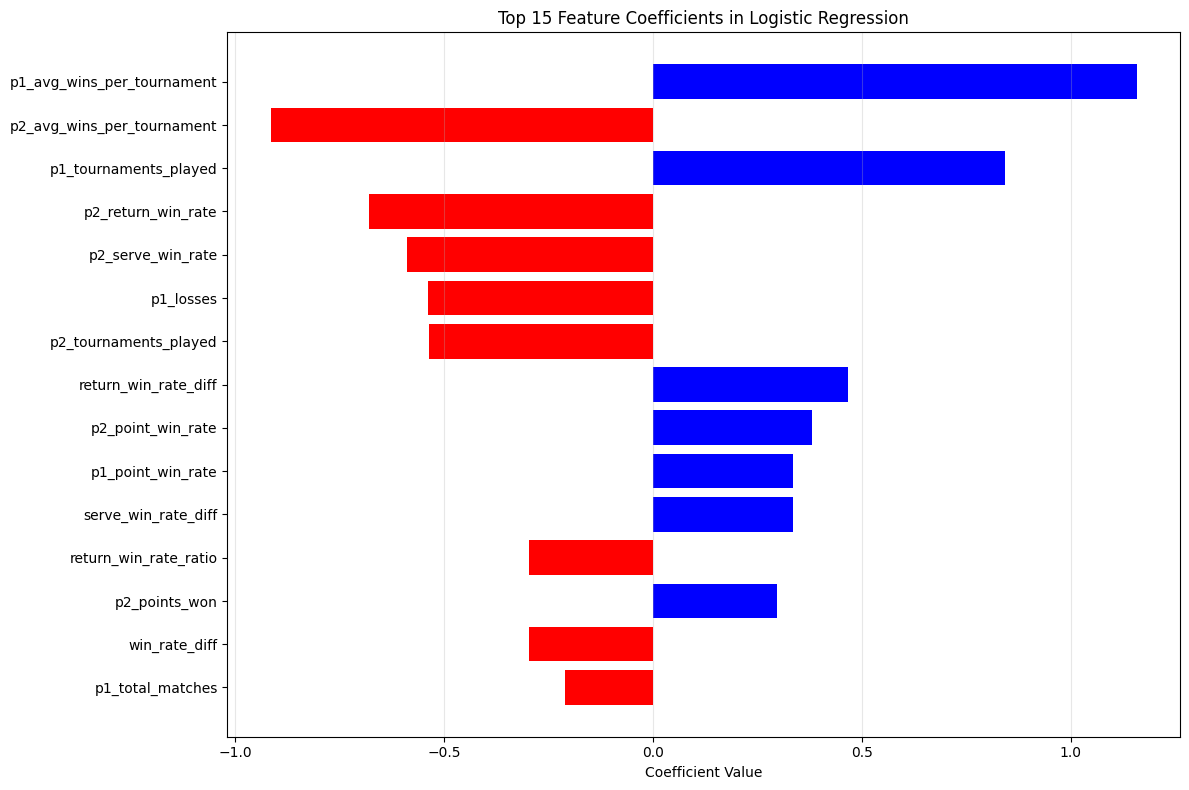

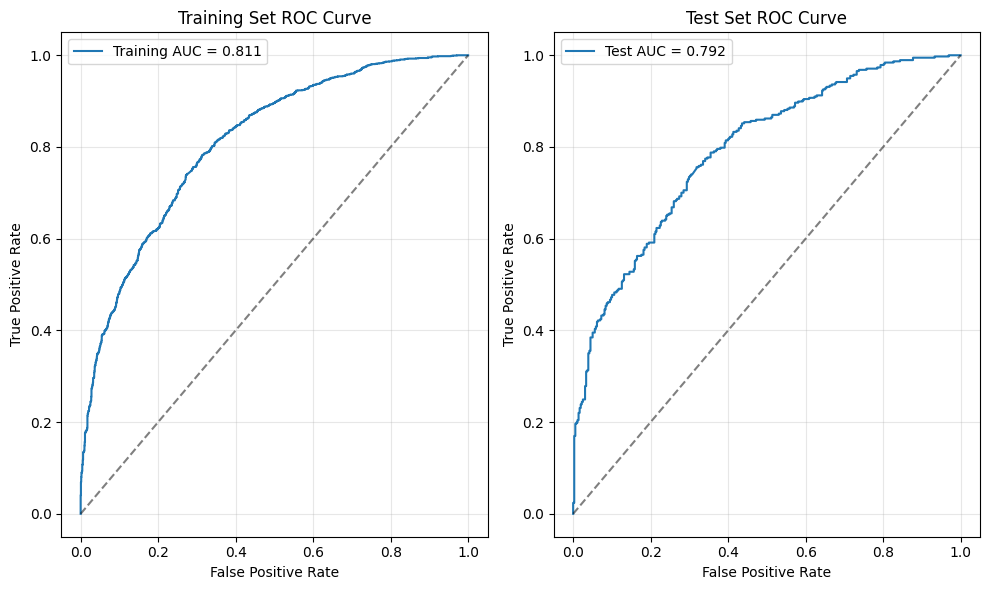


=== MODEL SUMMARY ===
Total features used: 43
Training samples: 2936
Test samples: 735
Best test accuracy: 0.7184
Best test AUC: 0.7917


In [ ]:
# Detailed Classification Report
print("=== TRAINING SET PERFORMANCE ===")
print(classification_report(y_train, y_train_pred))

print("\n=== TEST SET PERFORMANCE ===")
print(classification_report(y_test, y_test_pred))

# Confusion Matrices
print("\n=== CONFUSION MATRICES ===")
print("Training Set Confusion Matrix:")
train_cm = confusion_matrix(y_train, y_train_pred)
print(train_cm)

print("\nTest Set Confusion Matrix:")
test_cm = confusion_matrix(y_test, y_test_pred)
print(test_cm)

# Feature Importance Analysis
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lr_model.coef_[0],
    'abs_coefficient': np.abs(lr_model.coef_[0])
})

# Sort by absolute coefficient value
feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)

print("\n=== TOP 15 MOST IMPORTANT FEATURES ===")
print(feature_importance.head(15)[['feature', 'coefficient']].to_string(index=False))

# Plotting feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['coefficient'],
         color=['red' if x < 0 else 'blue' for x in top_features['coefficient']])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Feature Coefficients in Logistic Regression')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(10, 6))

# Training ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, label=f'Training AUC = {train_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training Set ROC Curve')
plt.legend()
plt.grid(alpha=0.3)

# Test ROC
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {test_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set ROC Curve')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== MODEL SUMMARY ===")
print(f"Total features used: {len(feature_columns)}")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Best test accuracy: {test_accuracy:.4f}")
print(f"Best test AUC: {test_auc:.4f}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_feature_importance(df, target_col='target', test_size=0.2, random_state=42):
    """
    Comprehensive feature importance analysis for tennis match prediction
    """

    # Prepare data - exclude non-numeric columns
    exclude_cols = ['match_id', 'player1', 'player2', target_col, 'winner_true', 'status', 'year', 'slam']
    feature_cols = [col for col in df.columns if col not in exclude_cols]

    # Further filter to only numeric columns
    numeric_cols = []
    for col in feature_cols:
        if df[col].dtype in ['int64', 'float64', 'int32', 'float32']:
            numeric_cols.append(col)

    print(f"Total columns: {len(df.columns)}")
    print(f"Excluded columns: {exclude_cols}")
    print(f"Numeric feature columns: {len(numeric_cols)}")

    X = df[numeric_cols].fillna(0)  # Handle any missing values
    y = df[target_col]

    # Update feature_cols to be the numeric ones
    feature_cols = numeric_cols

    print(f"Dataset shape: {X.shape}")
    print(f"Features: {len(feature_cols)}")
    print(f"Target distribution: {y.value_counts().to_dict()}")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # 1. Random Forest Feature Importance
    print("\n" + "="*50)
    print("1. RANDOM FOREST FEATURE IMPORTANCE")
    print("="*50)

    rf = RandomForestClassifier(n_estimators=100, random_state=random_state)
    rf.fit(X_train, y_train)

    rf_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Top 15 Most Important Features:")
    print(rf_importance.head(15))

    # 2. Gradient Boosting Feature Importance
    print("\n" + "="*50)
    print("2. GRADIENT BOOSTING FEATURE IMPORTANCE")
    print("="*50)

    gb = GradientBoostingClassifier(n_estimators=100, random_state=random_state)
    gb.fit(X_train, y_train)

    gb_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': gb.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Top 15 Most Important Features:")
    print(gb_importance.head(15))

    # 3. Baseline accuracy
    baseline_accuracy = accuracy_score(y_test, rf.predict(X_test))
    print(f"\nBaseline RF Accuracy (all features): {baseline_accuracy:.4f}")

    return {
        'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test,
        'feature_cols': feature_cols, 'rf_importance': rf_importance,
        'gb_importance': gb_importance, 'baseline_accuracy': baseline_accuracy
    }


def test_feature_subsets(analysis_results, top_n_features=[5, 10, 15, 20, 25, 30, 35, 40]):
    """
    Test accuracy with different numbers of top features
    """
    X_train = analysis_results['X_train']
    X_test = analysis_results['X_test']
    y_train = analysis_results['y_train']
    y_test = analysis_results['y_test']
    rf_importance = analysis_results['rf_importance']

    print("\n" + "="*50)
    print("3. FEATURE SUBSET TESTING")
    print("="*50)

    results = []

    for n in top_n_features:
        if n <= len(rf_importance):
            # Get top N features
            top_features = rf_importance.head(n)['feature'].tolist()

            # Train model with only these features
            rf = RandomForestClassifier(n_estimators=100, random_state=42)
            rf.fit(X_train[top_features], y_train)

            # Test accuracy
            accuracy = accuracy_score(y_test, rf.predict(X_test[top_features]))

            results.append({
                'n_features': n,
                'accuracy': accuracy,
                'features_used': top_features
            })

            print(f"Top {n:2d} features: {accuracy:.4f} accuracy")

    return results


def test_individual_feature_impact(analysis_results):
    """
    Test impact of removing individual top features (ablation study)
    """
    X_train = analysis_results['X_train']
    X_test = analysis_results['X_test']
    y_train = analysis_results['y_train']
    y_test = analysis_results['y_test']
    rf_importance = analysis_results['rf_importance']
    baseline_accuracy = analysis_results['baseline_accuracy']

    print("\n" + "="*50)
    print("4. INDIVIDUAL FEATURE ABLATION")
    print("="*50)

    # Test removing each of the top 10 features individually
    top_10_features = rf_importance.head(10)['feature'].tolist()
    all_features = analysis_results['feature_cols']

    ablation_results = []

    for feature_to_remove in top_10_features:
        # Create feature set without this feature
        features_without = [f for f in all_features if f != feature_to_remove]

        # Train model without this feature
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train[features_without], y_train)

        # Test accuracy
        accuracy = accuracy_score(y_test, rf.predict(X_test[features_without]))
        accuracy_drop = baseline_accuracy - accuracy

        ablation_results.append({
            'removed_feature': feature_to_remove,
            'accuracy': accuracy,
            'accuracy_drop': accuracy_drop
        })

        print(f"Without '{feature_to_remove}': {accuracy:.4f} (drop: {accuracy_drop:+.4f})")

    return ablation_results


def test_feature_categories(analysis_results):
    """
    Test accuracy with different categories of features
    """
    feature_cols = analysis_results['feature_cols']

    # Categorize features
    categories = {
        'Basic Stats': [f for f in feature_cols if any(x in f for x in ['total_matches', 'wins', 'losses', 'win_rate'])],
        'Serve Stats': [f for f in feature_cols if 'serve' in f],
        'Return Stats': [f for f in feature_cols if 'return' in f],
        'Rally Stats': [f for f in feature_cols if 'rally' in f],
        'Point Stats': [f for f in feature_cols if 'point' in f and 'serve' not in f and 'return' not in f],
        'Comparative': [f for f in feature_cols if any(x in f for x in ['_diff', '_ratio'])],
        'Experience': [f for f in feature_cols if 'experience' in f or 'tournament' in f],
        'Style': [f for f in feature_cols if any(x in f for x in ['speed', 'momentum', 'style'])]
    }

    X_train = analysis_results['X_train']
    X_test = analysis_results['X_test']
    y_train = analysis_results['y_train']
    y_test = analysis_results['y_test']

    print("\n" + "="*50)
    print("5. FEATURE CATEGORY TESTING")
    print("="*50)

    category_results = []

    for category, features in categories.items():
        if len(features) > 0:
            # Test with only this category
            rf = RandomForestClassifier(n_estimators=100, random_state=42)
            rf.fit(X_train[features], y_train)
            accuracy = accuracy_score(y_test, rf.predict(X_test[features]))

            category_results.append({
                'category': category,
                'n_features': len(features),
                'accuracy': accuracy,
                'features': features
            })

            print(f"{category:12s} ({len(features):2d} features): {accuracy:.4f}")

    return category_results


def plot_feature_importance(rf_importance, gb_importance, top_n=20):
    """
    Plot feature importance comparison
    """
    # Merge importance from both models
    importance_comparison = rf_importance.head(top_n).merge(
        gb_importance[['feature', 'importance']],
        on='feature',
        suffixes=('_rf', '_gb')
    )

    plt.figure(figsize=(12, 8))

    # Plot comparison
    x = np.arange(len(importance_comparison))
    width = 0.35

    plt.bar(x - width/2, importance_comparison['importance_rf'],
           width, label='Random Forest', alpha=0.8)
    plt.bar(x + width/2, importance_comparison['importance_gb'],
           width, label='Gradient Boosting', alpha=0.8)

    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'Top {top_n} Feature Importance Comparison')
    plt.xticks(x, importance_comparison['feature'], rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()


# Complete analysis workflow
def run_complete_feature_analysis(df, target_col='target'):
    """
    Run complete feature importance analysis
    """
    print("Starting comprehensive feature analysis...")

    # 1. Basic feature importance
    analysis_results = analyze_feature_importance(df, target_col)

    # 2. Test different numbers of features
    subset_results = test_feature_subsets(analysis_results)

    # 3. Test impact of individual features
    ablation_results = test_individual_feature_impact(analysis_results)

    # 4. Test feature categories
    category_results = test_feature_categories(analysis_results)

    # 5. Plot results
    plot_feature_importance(
        analysis_results['rf_importance'],
        analysis_results['gb_importance']
    )

    # Summary
    print("\n" + "="*50)
    print("SUMMARY & RECOMMENDATIONS")
    print("="*50)

    print("\nMost Important Features:")
    for i, row in analysis_results['rf_importance'].head(5).iterrows():
        print(f"{i+1}. {row['feature']}: {row['importance']:.4f}")

    print(f"\nOptimal number of features:")
    best_subset = max(subset_results, key=lambda x: x['accuracy'])
    print(f"Best: {best_subset['n_features']} features with {best_subset['accuracy']:.4f} accuracy")

    print(f"\nMost impactful features to remove:")
    worst_ablation = max(ablation_results, key=lambda x: x['accuracy_drop'])
    print(f"Removing '{worst_ablation['removed_feature']}' drops accuracy by {worst_ablation['accuracy_drop']:.4f}")

    return {
        'analysis_results': analysis_results,
        'subset_results': subset_results,
        'ablation_results': ablation_results,
        'category_results': category_results
    }


# Example usage:
# complete_results = run_complete_feature_analysis(your_progressive_features_df)

Starting comprehensive feature analysis...
Total columns: 50
Excluded columns: ['match_id', 'player1', 'player2', 'target', 'winner_true', 'status', 'year', 'slam']
Numeric feature columns: 42
Dataset shape: (3671, 42)
Features: 42
Target distribution: {1: 1881, 0: 1790}

1. RANDOM FOREST FEATURE IMPORTANCE
Top 15 Most Important Features:
                   feature  importance
38         experience_diff    0.062893
32     point_win_rate_diff    0.057750
33    point_win_rate_ratio    0.052370
30           win_rate_diff    0.047955
35    serve_win_rate_ratio    0.045756
34     serve_win_rate_diff    0.037512
13       p2_point_win_rate    0.028190
31          win_rate_ratio    0.027814
39        serve_speed_diff    0.026979
15       p2_serve_win_rate    0.025933
12       p1_point_win_rate    0.025682
37   return_win_rate_ratio    0.024319
8   p1_total_points_played    0.023963
18      p1_avg_serve_speed    0.023884
36    return_win_rate_diff    0.023337

2. GRADIENT BOOSTING FEATURE IMPOR

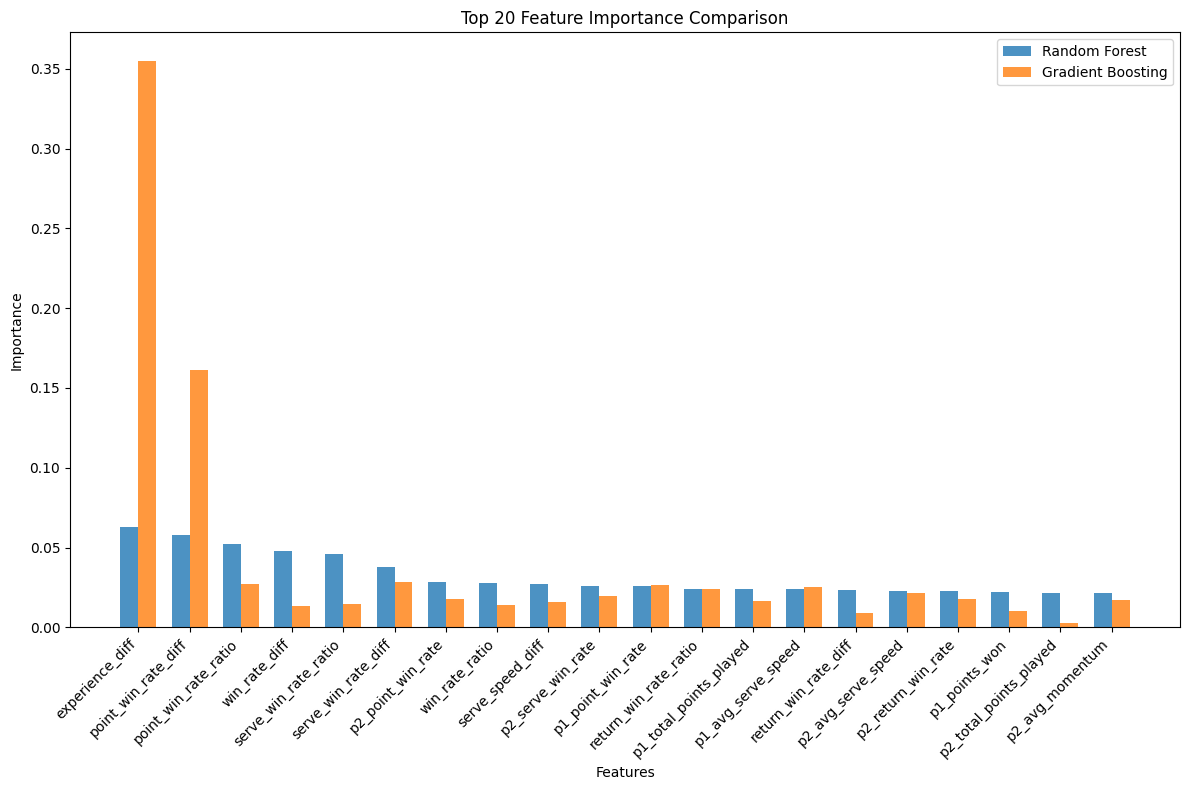


SUMMARY & RECOMMENDATIONS

Most Important Features:
39. experience_diff: 0.0629
33. point_win_rate_diff: 0.0577
34. point_win_rate_ratio: 0.0524
31. win_rate_diff: 0.0480
36. serve_win_rate_ratio: 0.0458

Optimal number of features:
Best: 25 features with 0.7170 accuracy

Most impactful features to remove:
Removing 'serve_speed_diff' drops accuracy by 0.0190


In [ ]:
complete_results = run_complete_feature_analysis(progressive_features_df)

In [ ]:
print(points_df.columns)

Index(['match_id', 'ElapsedTime', 'SetNo', 'P1GamesWon', 'P2GamesWon',
       'SetWinner', 'GameNo', 'GameWinner', 'PointNumber', 'PointWinner',
       'PointServer', 'Speed_KMH', 'Rally', 'P1Score', 'P2Score', 'P1Momentum',
       'P2Momentum', 'P1PointsWon', 'P2PointsWon', 'P1Ace', 'P2Ace',
       'P1Winner', 'P2Winner', 'P1DoubleFault', 'P2DoubleFault', 'P1UnfErr',
       'P2UnfErr', 'P1NetPoint', 'P2NetPoint', 'P1NetPointWon',
       'P2NetPointWon', 'P1BreakPoint', 'P2BreakPoint', 'P1BreakPointWon',
       'P2BreakPointWon', 'P1FirstSrvIn', 'P2FirstSrvIn', 'P1FirstSrvWon',
       'P2FirstSrvWon', 'P1SecondSrvIn', 'P2SecondSrvIn', 'P1SecondSrvWon',
       'P2SecondSrvWon', 'P1ForcedError', 'P2ForcedError', 'History',
       'Speed_MPH', 'P1BreakPointMissed', 'P2BreakPointMissed',
       'ServeIndicator', 'P1TurningPoint', 'P2TurningPoint', 'Serve_Direction',
       'Winner_FH', 'Winner_BH', 'ServingTo', 'ServeNumber', 'WinnerType',
       'WinnerShotType', 'P1DistanceRun', 'P2Dista

In [ ]:
print(points_df.head(3))

            match_id ElapsedTime  SetNo  P1GamesWon  P2GamesWon  SetWinner  \
0  2011-ausopen-1101    00:00:00    1.0         0.0         0.0        0.0   
1  2011-ausopen-1101     0:00:00    1.0         0.0         0.0        0.0   
2  2011-ausopen-1101     0:00:23    1.0         0.0         0.0        0.0   

   GameNo  GameWinner PointNumber  PointWinner  ...  ServeNumber  WinnerType  \
0     1.0         0.0           0          0.0  ...          NaN         NaN   
1     1.0         0.0           1          1.0  ...          NaN         NaN   
2     1.0         0.0           2          1.0  ...          NaN         NaN   

   WinnerShotType P1DistanceRun P2DistanceRun  RallyCount  ServeWidth  \
0             NaN           NaN           NaN         NaN         NaN   
1             NaN           NaN           NaN         NaN         NaN   
2             NaN           NaN           NaN         NaN         NaN   

   ServeDepth  ReturnDepth  match_num_str  
0         NaN          NaN   

In [ ]:
with pd.option_context('display.max_columns', None):
    print(progressive_features_df.head(3))

            match_id        player1        player2  year     slam  \
0  2011-ausopen-1101   Rafael Nadal  Marcos Daniel  2011  ausopen   
1  2011-ausopen-1103  Bernard Tomic  Jeremy Chardy  2011  ausopen   
2  2011-ausopen-1105     John Isner  Florent Serra  2011  ausopen   

   winner_true    status  p1_total_matches  p2_total_matches  p1_wins  \
0          1.0   Retired                 0                 0        0   
1          1.0  Complete                 0                 0        0   
2          1.0  Complete                 0                 0        0   

   p2_wins  p1_losses  p2_losses  p1_win_rate  p2_win_rate  \
0        0          0          0          0.5          0.5   
1        0          0          0          0.5          0.5   
2        0          0          0          0.5          0.5   

   p1_total_points_played  p2_total_points_played  p1_points_won  \
0                       0                       0              0   
1                       0                    

# Markov Chain New

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
import re

def check_match_completion(points_df, progressive_features_df):
    """
    Determine which matches are complete by checking if either player won 3 sets
    Returns updated progressive_features_df with calculated completion status
    """
    print("Calculating match completion status...")

    match_completion = {}

    for match_id in points_df['match_id'].unique():
        match_points = points_df[points_df['match_id'] == match_id].copy()

        # Get set winners for this match
        set_winners = match_points[match_points['SetWinner'] != 0]['SetWinner'].tolist()

        if len(set_winners) == 0:
            # No sets completed
            match_completion[match_id] = 'Incomplete'
            continue

        # Count sets won by each player
        p1_sets = set_winners.count(1)
        p2_sets = set_winners.count(2)

        # Check if match is complete (first to 3 sets in best-of-5)
        if p1_sets >= 3 or p2_sets >= 3:
            match_completion[match_id] = 'Complete'

            # Determine winner
            winner = 1 if p1_sets > p2_sets else 2
            match_completion[match_id + '_winner'] = winner
        else:
            match_completion[match_id] = 'Incomplete'

    # Update progressive_features_df with calculated status
    updated_df = progressive_features_df.copy()
    updated_df['calculated_status'] = updated_df['match_id'].map(
        lambda x: match_completion.get(x, 'Unknown')
    )
    updated_df['calculated_winner'] = updated_df['match_id'].map(
        lambda x: match_completion.get(x + '_winner', None)
    )

    print(f"Match completion summary:")
    print(f"Complete matches: {sum(1 for v in match_completion.values() if v == 'Complete')}")
    print(f"Incomplete matches: {sum(1 for v in match_completion.values() if v == 'Incomplete')}")

    return updated_df, match_completion

def parse_tennis_score(score_str):
    """
    Convert tennis score string to standardized format
    Handles: 0, 15, 30, 40, AD (advantage)
    """
    if pd.isna(score_str):
        return "0"

    score_str = str(score_str).strip()

    # Handle advantage notation
    if score_str.upper() in ['AD', 'ADV', 'ADVANTAGE']:
        return "AD"

    # Handle standard scores
    if score_str in ['0', '15', '30', '40']:
        return score_str

    # Handle deuce (sometimes represented as 40-40)
    if score_str == '40' and False:  # We'll handle deuce at the game state level
        return "40"

    # Default fallback
    return "0"

def create_game_state(p1_score, p2_score):
    """
    Create standardized game state from individual scores
    Returns: (p1_score, p2_score) tuple in standard format
    """
    p1 = parse_tennis_score(p1_score)
    p2 = parse_tennis_score(p2_score)

    # Handle special cases
    if p1 == "40" and p2 == "40":
        return ("40", "40")  # Deuce
    elif p1 == "AD":
        return ("AD", "40")
    elif p2 == "AD":
        return ("40", "AD")

    return (p1, p2)

def extract_match_states(points_df):
    """
    Extract all states from points data for each match
    Returns dictionary: {match_id: [list of states]}
    """
    print("Extracting match states from points data...")

    match_states = {}
    skipped_rows = 0
    total_rows = 0

    for match_id in points_df['match_id'].unique():
        if match_id is None or pd.isna(match_id):
            continue

        match_points = points_df[points_df['match_id'] == match_id].copy()
        match_points = match_points.sort_values(['SetNo', 'GameNo', 'PointNumber'])

        states = []

        for _, point in match_points.iterrows():
            total_rows += 1

            # Check for NaN values in required columns
            required_cols = ['SetNo', 'P1GamesWon', 'P2GamesWon', 'PointServer', 'PointWinner', 'PointNumber']
            if any(pd.isna(point[col]) for col in required_cols):
                skipped_rows += 1
                continue

            # Check for NaN in score columns (allow them to be NaN, we'll handle in create_game_state)
            try:
                # Create state before this point
                game_score = create_game_state(point['P1Score'], point['P2Score'])

                state = {
                    'match_id': match_id,
                    'set_num': int(point['SetNo']),
                    'p1_games': int(point['P1GamesWon']),
                    'p2_games': int(point['P2GamesWon']),
                    'game_score': game_score,
                    'server': int(point['PointServer']),
                    'point_winner': int(point['PointWinner']),
                    'point_number': int(point['PointNumber'])
                }

                states.append(state)

            except (ValueError, TypeError) as e:
                # Skip rows where conversion fails
                skipped_rows += 1
                continue

        if states:  # Only add matches that have valid states
            match_states[match_id] = states

    print(f"Extracted states for {len(match_states)} matches")
    print(f"Total rows processed: {total_rows}")
    print(f"Skipped rows due to NaN/invalid values: {skipped_rows}")
    print(f"Valid states created: {sum(len(states) for states in match_states.values())}")

    return match_states

def calculate_set_scores(match_states):
    """
    Calculate set scores for each state by tracking completed sets
    """
    print("Calculating set scores for each state...")

    for match_id, states in match_states.items():
        p1_sets_won = 0
        p2_sets_won = 0
        current_set = 1

        for i, state in enumerate(states):
            # Add set score to state
            state['p1_sets'] = p1_sets_won
            state['p2_sets'] = p2_sets_won

            # Check if we've moved to a new set
            if state['set_num'] > current_set:
                # Previous set was completed - determine winner
                # Look at the last state of previous set
                if i > 0:
                    prev_state = states[i-1]
                    if prev_state['p1_games'] > prev_state['p2_games']:
                        p1_sets_won += 1
                    else:
                        p2_sets_won += 1

                current_set = state['set_num']

                # Update this state with new set scores
                state['p1_sets'] = p1_sets_won
                state['p2_sets'] = p2_sets_won

    return match_states

# Example usage and testing
def test_preprocessing(points_df, progressive_features_df):
    """
    Test the preprocessing functions
    """
    print("Testing preprocessing functions...")

    # Check match completion
    updated_df, completion_status = check_match_completion(points_df, progressive_features_df)

    # Show comparison of calculated vs original status
    if 'status' in progressive_features_df.columns:
        comparison = updated_df[['match_id', 'status', 'calculated_status']].head(10)
        print("\nStatus comparison (first 10 matches):")
        print(comparison)

    # Extract states for a sample match


    match_states = extract_match_states(points_df)
    match_states = calculate_set_scores(match_states)

    # Show sample states
    print("\nSample match states:")
    for match_id, states in list(match_states.items())[:1]:
        print(f"\nMatch: {match_id}")
        print("First 5 states:")
        for state in states[:5]:
            print(f"  Set {state['set_num']}: {state['p1_sets']}-{state['p2_sets']} sets, "
                  f"{state['p1_games']}-{state['p2_games']} games, "
                  f"Game: {state['game_score']}, Server: P{state['server']}")

    return updated_df, match_states

# Run the test
# updated_features_df, full_states = test_preprocessing(points_df, progressive_features_df)

In [ ]:
print(points_df.head(3))

            match_id ElapsedTime  SetNo  P1GamesWon  P2GamesWon  SetWinner  \
0  2011-ausopen-1101    00:00:00    1.0         0.0         0.0        0.0   
1  2011-ausopen-1101     0:00:00    1.0         0.0         0.0        0.0   
2  2011-ausopen-1101     0:00:23    1.0         0.0         0.0        0.0   

   GameNo  GameWinner PointNumber  PointWinner  ...  ServeNumber  WinnerType  \
0     1.0         0.0           0          0.0  ...          NaN         NaN   
1     1.0         0.0           1          1.0  ...          NaN         NaN   
2     1.0         0.0           2          1.0  ...          NaN         NaN   

   WinnerShotType P1DistanceRun P2DistanceRun  RallyCount  ServeWidth  \
0             NaN           NaN           NaN         NaN         NaN   
1             NaN           NaN           NaN         NaN         NaN   
2             NaN           NaN           NaN         NaN         NaN   

   ServeDepth  ReturnDepth  match_num_str  
0         NaN          NaN   

In [ ]:
updated_features_df, full_states = test_preprocessing(points_df, progressive_features_df)

Testing preprocessing functions...
Calculating match completion status...
Match completion summary:
Complete matches: 3520
Incomplete matches: 1058

Status comparison (first 10 matches):
            match_id    status calculated_status
0  2011-ausopen-1101   Retired        Incomplete
1  2011-ausopen-1103  Complete          Complete
2  2011-ausopen-1105  Complete          Complete
3  2011-ausopen-1108  Complete          Complete
4  2011-ausopen-1112  Complete          Complete
5  2011-ausopen-1113  Complete          Complete
6  2011-ausopen-1114  Complete          Complete
7  2011-ausopen-1115  Complete          Complete
8  2011-ausopen-1116  Complete          Complete
9  2011-ausopen-1117  Complete          Complete
Extracting match states from points data...
Extracted states for 3692 matches
Total rows processed: 1021380
Skipped rows due to NaN/invalid values: 202439
Valid states created: 818941
Calculating set scores for each state...

Sample match states:

Match: 2011-ausopen-1101
F

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict, Counter

class TennisState:
    """
    Represents a tennis match state
    """
    def __init__(self, p1_sets=0, p2_sets=0, p1_games=0, p2_games=0,
                 game_score=("0", "0"), server=1):
        self.p1_sets = p1_sets
        self.p2_sets = p2_sets
        self.p1_games = p1_games
        self.p2_games = p2_games
        self.game_score = game_score  # (p1_score, p2_score)
        self.server = server

    def __str__(self):
        return f"Sets:{self.p1_sets}-{self.p2_sets}, Games:{self.p1_games}-{self.p2_games}, Game:{self.game_score}, Server:P{self.server}"

    def __hash__(self):
        return hash((self.p1_sets, self.p2_sets, self.p1_games, self.p2_games,
                    self.game_score, self.server))

    def __eq__(self, other):
        return (self.p1_sets == other.p1_sets and self.p2_sets == other.p2_sets and
                self.p1_games == other.p1_games and self.p2_games == other.p2_games and
                self.game_score == other.game_score and self.server == other.server)

    def to_key(self):
        """Convert to hashable key for dictionaries"""
        return (self.p1_sets, self.p2_sets, self.p1_games, self.p2_games,
                self.game_score, self.server)

    def is_match_over(self):
        """Check if match is complete (best of 5 sets)"""
        return self.p1_sets >= 3 or self.p2_sets >= 3

    def is_break_point(self):
        """Check if it's a break point (returner can win the game)"""
        p1_score, p2_score = self.game_score

        # Break point situations
        if self.server == 1:  # P1 serving, P2 can break
            return (p1_score in ["0", "15", "30"] and p2_score == "40") or p2_score == "AD"
        else:  # P2 serving, P1 can break
            return (p2_score in ["0", "15", "30"] and p1_score == "40") or p1_score == "AD"

    def is_set_point(self):
        """Check if it's a set point (someone can win the set)"""
        # Regular games (not tiebreak)
        if self.p1_games >= 5 and self.p1_games >= self.p2_games + 1:
            # P1 can win set
            if self.server == 1:  # P1 serving for set
                return self.game_score[0] in ["40", "AD"] or (self.game_score == ("40", "40"))
            else:  # P1 returning, needs to break for set
                return self.is_break_point()

        if self.p2_games >= 5 and self.p2_games >= self.p1_games + 1:
            # P2 can win set
            if self.server == 2:  # P2 serving for set
                return self.game_score[1] in ["40", "AD"] or (self.game_score == ("40", "40"))
            else:  # P2 returning, needs to break for set
                return self.is_break_point()

        return False

    def is_match_point(self):
        """Check if it's a match point (someone can win the match)"""
        # Check if either player is one set away from winning (2 sets won)
        if self.p1_sets == 2:  # P1 needs one more set
            return self.is_set_point()
        elif self.p2_sets == 2:  # P2 needs one more set
            return self.is_set_point()
        return False

def get_next_state(current_state, point_winner):
    """
    Calculate the next state after a point is won
    """
    p1_score, p2_score = current_state.game_score
    new_p1_sets = current_state.p1_sets
    new_p2_sets = current_state.p2_sets
    new_p1_games = current_state.p1_games
    new_p2_games = current_state.p2_games
    new_server = current_state.server

    # Score progression mapping
    score_progression = {"0": "15", "15": "30", "30": "40"}

    # Update game score
    if point_winner == 1:  # P1 wins point
        if p1_score == "40":
            if p2_score in ["0", "15", "30"]:
                # P1 wins game
                new_p1_games += 1
                new_game_score = ("0", "0")
                new_server = 2 if current_state.server == 1 else 1  # Switch server

                # Check if set is won
                if new_p1_games >= 6 and new_p1_games >= new_p2_games + 2:
                    new_p1_sets += 1
                    new_p1_games = 0
                    new_p2_games = 0
                    new_server = 1  # P1 serves first in next set
                elif new_p1_games == 6 and new_p2_games == 6:
                    # TODO: Handle tiebreak (simplified for now)
                    new_p1_sets += 1
                    new_p1_games = 0
                    new_p2_games = 0
                    new_server = 1
            elif p2_score == "40":
                # From deuce to advantage
                new_game_score = ("AD", "40")
            elif p2_score == "AD":
                # Back to deuce
                new_game_score = ("40", "40")
            else:
                new_game_score = ("40", p2_score)
        elif p1_score == "AD":
            # P1 wins from advantage
            new_p1_games += 1
            new_game_score = ("0", "0")
            new_server = 2 if current_state.server == 1 else 1

            # Check if set is won
            if new_p1_games >= 6 and new_p1_games >= new_p2_games + 2:
                new_p1_sets += 1
                new_p1_games = 0
                new_p2_games = 0
                new_server = 1
            elif new_p1_games == 6 and new_p2_games == 6:
                new_p1_sets += 1
                new_p1_games = 0
                new_p2_games = 0
                new_server = 1
        else:
            # Normal score progression
            new_p1_score = score_progression.get(p1_score, "40")
            new_game_score = (new_p1_score, p2_score)

    else:  # P2 wins point
        if p2_score == "40":
            if p1_score in ["0", "15", "30"]:
                # P2 wins game
                new_p2_games += 1
                new_game_score = ("0", "0")
                new_server = 2 if current_state.server == 1 else 1

                # Check if set is won
                if new_p2_games >= 6 and new_p2_games >= new_p1_games + 2:
                    new_p2_sets += 1
                    new_p1_games = 0
                    new_p2_games = 0
                    new_server = 1
                elif new_p1_games == 6 and new_p2_games == 6:
                    new_p2_sets += 1
                    new_p1_games = 0
                    new_p2_games = 0
                    new_server = 1
            elif p1_score == "40":
                # From deuce to advantage
                new_game_score = ("40", "AD")
            elif p1_score == "AD":
                # Back to deuce
                new_game_score = ("40", "40")
            else:
                new_game_score = (p1_score, "40")
        elif p2_score == "AD":
            # P2 wins from advantage
            new_p2_games += 1
            new_game_score = ("0", "0")
            new_server = 2 if current_state.server == 1 else 1

            # Check if set is won
            if new_p2_games >= 6 and new_p2_games >= new_p1_games + 2:
                new_p2_sets += 1
                new_p1_games = 0
                new_p2_games = 0
                new_server = 1
            elif new_p1_games == 6 and new_p2_games == 6:
                new_p2_sets += 1
                new_p1_games = 0
                new_p2_games = 0
                new_server = 1
        else:
            # Normal score progression
            new_p2_score = score_progression.get(p2_score, "40")
            new_game_score = (p1_score, new_p2_score)

    return TennisState(new_p1_sets, new_p2_sets, new_p1_games, new_p2_games,
                      new_game_score, new_server)

def build_universal_transition_matrix(match_states):
    """
    Build a universal base transition matrix from all observed match data.
    This captures general tennis patterns independent of specific players.
    Returns: transitions[state_key] = {1: prob_p1_wins, 2: prob_p2_wins}
    """
    print("Building universal base transition matrix...")

    transitions = defaultdict(lambda: {1: 0, 2: 0})
    state_counts = defaultdict(int)
    skipped_points = 0
    total_points = 0

    for match_id, states in match_states.items():
        for i, state in enumerate(states):
            total_points += 1

            # Validate point_winner
            point_winner = state.get('point_winner', 0)
            if point_winner not in [1, 2]:
                skipped_points += 1
                continue

            # Validate required fields
            required_fields = ['p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'game_score', 'server']
            if not all(field in state for field in required_fields):
                skipped_points += 1
                continue

            try:
                # Create current state
                current_state = TennisState(
                    state['p1_sets'], state['p2_sets'],
                    state['p1_games'], state['p2_games'],
                    state['game_score'], state['server']
                )

                state_key = current_state.to_key()

                # Count this transition
                transitions[state_key][point_winner] += 1
                state_counts[state_key] += 1

            except Exception as e:
                print(f"Error processing state in match {match_id}: {e}")
                skipped_points += 1
                continue

    # Convert counts to probabilities
    universal_transitions = {}
    for state_key, counts in transitions.items():
        total = sum(counts.values())
        if total > 0:
            universal_transitions[state_key] = {
                1: counts[1] / total,
                2: counts[2] / total
            }
        else:
            # Default to 50-50 if no data
            universal_transitions[state_key] = {1: 0.5, 2: 0.5}

    print(f"Built universal transitions for {len(universal_transitions)} unique states")
    print(f"Total points processed: {total_points}")
    print(f"Valid state observations: {sum(state_counts.values())}")
    print(f"Skipped points: {skipped_points}")

    return universal_transitions, state_counts

def get_player_stats_for_match(match_id, progressive_features_df):
    """
    Extract player-specific statistics for a given match
    Returns: (player1_stats, player2_stats) dictionaries
    """
    match_data = progressive_features_df[progressive_features_df['match_id'] == match_id]

    if len(match_data) == 0:
        print(f"Warning: No player stats found for match {match_id}")
        # Return default stats
        default_stats = {
            'serve_win_rate': 0.65,
            'return_win_rate': 0.35,
            'name': 'Unknown'
        }
        return default_stats.copy(), default_stats.copy()

    match_row = match_data.iloc[0]

    player1_stats = {
        'name': match_row['player1'],
        'serve_win_rate': match_row['p1_serve_win_rate'],
        'return_win_rate': match_row['p1_return_win_rate'],
        'total_matches': match_row['p1_total_matches'],
        'win_rate': match_row['p1_win_rate'],
    }

    player2_stats = {
        'name': match_row['player2'],
        'serve_win_rate': match_row['p2_serve_win_rate'],
        'return_win_rate': match_row['p2_return_win_rate'],
        'total_matches': match_row['p2_total_matches'],
        'win_rate': match_row['p2_win_rate'],
    }

    return player1_stats, player2_stats

def create_match_specific_transitions(universal_transitions, player1_stats, player2_stats):
    """
    Create match-specific transition matrix by modifying universal transitions
    based on the specific players' serve/return abilities and pressure situations
    """
    match_transitions = {}

    # Extract player abilities with fallback defaults
    p1_serve_rate = max(0.1, min(0.9, player1_stats.get('serve_win_rate', 0.65)))
    p1_return_rate = max(0.1, min(0.9, player1_stats.get('return_win_rate', 0.35)))
    p2_serve_rate = max(0.1, min(0.9, player2_stats.get('serve_win_rate', 0.65)))
    p2_return_rate = max(0.1, min(0.9, player2_stats.get('return_win_rate', 0.35)))

    for state_key, base_probs in universal_transitions.items():
        p1_sets, p2_sets, p1_games, p2_games, game_score, server = state_key

        # Create state object for pressure detection
        state = TennisState(p1_sets, p2_sets, p1_games, p2_games, game_score, server)

        # Calculate player-specific probability
        if server == 1:  # P1 serving
            # P1's serve ability vs P2's return ability
            # Use a competitive model: P1's serve strength vs P2's return strength
            serve_strength = p1_serve_rate
            return_strength = p2_return_rate
            # Model: stronger server vs stronger returner
            player_prob = serve_strength * (1 - return_strength) / (
                serve_strength * (1 - return_strength) + (1 - serve_strength) * return_strength + 1e-8
            )
        else:  # P2 serving
            # P2's serve ability vs P1's return ability
            serve_strength = p2_serve_rate
            return_strength = p1_return_rate
            # P1's probability of winning when P2 serves
            player_prob = return_strength * (1 - serve_strength) / (
                return_strength * (1 - serve_strength) + (1 - return_strength) * serve_strength + 1e-8
            )

        # Blend player-specific calculation with universal data
        universal_prob = base_probs[1]  # Universal P1 win probability

        # Weight based on how much data we have for this state
        # More historical data = trust universal more, less data = trust player stats more
        state_observations = sum(universal_transitions.get(state_key, {1: 1, 2: 1}).values()) - 2  # subtract initial counts
        confidence_weight = min(0.7, state_observations / 100.0)  # Max 70% weight to universal

        blended_prob = confidence_weight * universal_prob + (1 - confidence_weight) * player_prob

        # Apply pressure situation modifiers
        if state.is_match_point():
            # Match point: slightly favor the favorite (reduce upsets)
            if blended_prob > 0.5:
                pressure_modifier = 1.02  # Slight boost to favorite
            else:
                pressure_modifier = 0.98  # Slight reduction to underdog
        elif state.is_set_point():
            # Set point: smaller effect
            if blended_prob > 0.5:
                pressure_modifier = 1.01
            else:
                pressure_modifier = 0.99
        elif state.is_break_point():
            # Break point: returner gets slight boost (breaking serve is valuable)
            if server == 1:  # P2 trying to break
                pressure_modifier = 0.97  # Reduce P1's probability
            else:  # P1 trying to break
                pressure_modifier = 1.03  # Boost P1's probability
        else:
            pressure_modifier = 1.0

        final_p1_prob = blended_prob * pressure_modifier
        final_p1_prob = max(0.05, min(0.95, final_p1_prob))  # Clamp to reasonable range

        match_transitions[state_key] = {
            1: final_p1_prob,
            2: 1 - final_p1_prob
        }

    return match_transitions

def test_match_specific_transitions(progressive_features_df, universal_transitions):
    """
    Test creating match-specific transitions for a few matches
    """
    print("Testing match-specific transition creation...")

    # Get a few sample matches
    sample_matches = progressive_features_df.head(3)

    for _, match_row in sample_matches.iterrows():
        match_id = match_row['match_id']

        # Get player stats
        p1_stats, p2_stats = get_player_stats_for_match(match_id, progressive_features_df)

        print(f"\nMatch: {match_id}")
        print(f"P1 ({p1_stats['name']}): serve={p1_stats['serve_win_rate']:.3f}, return={p1_stats['return_win_rate']:.3f}")
        print(f"P2 ({p2_stats['name']}): serve={p2_stats['serve_win_rate']:.3f}, return={p2_stats['return_win_rate']:.3f}")

        # Create match-specific transitions
        match_transitions = create_match_specific_transitions(universal_transitions, p1_stats, p2_stats)

        # Show some example transitions
        sample_states = [
            (0, 0, 0, 0, ("0", "0"), 1),      # Start of match, P1 serving
            (0, 0, 0, 0, ("0", "0"), 2),      # Start of match, P2 serving
            (0, 0, 1, 2, ("30", "40"), 1),    # Break point against P1
            (1, 1, 5, 4, ("40", "30"), 1),    # P1 serving for set
        ]

        print("Sample transition probabilities:")
        for state_key in sample_states:
            if state_key in match_transitions:
                prob = match_transitions[state_key][1]
                state = TennisState(*state_key)
                print(f"  {state}: P1 wins = {prob:.3f}")

# Test functions
def run_transition_tests(match_states, progressive_features_df):
    """
    Run all the transition matrix tests
    """
    print("Running transition matrix tests...")

    # Build universal transition matrix
    universal_transitions, state_counts = build_universal_transition_matrix(match_states)

    # Test match-specific transitions
    test_match_specific_transitions(progressive_features_df, universal_transitions)

    return universal_transitions, state_counts

# Usage example:
# universal_transitions, state_counts = run_transition_tests(complete_states, updated_features_df)

Extracting match states from points data...


ValueError: cannot convert float NaN to integer

In [ ]:
print(updated_features_df.head(3))

            match_id        player1        player2  year     slam  \
0  2011-ausopen-1101   Rafael Nadal  Marcos Daniel  2011  ausopen   
1  2011-ausopen-1103  Bernard Tomic  Jeremy Chardy  2011  ausopen   
2  2011-ausopen-1105     John Isner  Florent Serra  2011  ausopen   

   winner_true    status  p1_total_matches  p2_total_matches  p1_wins  ...  \
0          1.0   Retired                 0                 0        0  ...   
1          1.0  Complete                 0                 0        0  ...   
2          1.0  Complete                 0                 0        0  ...   

   serve_win_rate_ratio  return_win_rate_diff  return_win_rate_ratio  \
0                   1.0                   0.0                    1.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    1.0   

   experience_diff  serve_speed_diff  rally_style_diff  h2h_available  target  \
0                0               0.0    

In [ ]:

universal_transitions, state_counts = run_transition_tests(full_states, updated_features_df)

Running transition matrix tests...
Building universal base transition matrix...
Built universal transitions for 13862 unique states
Total points processed: 818941
Valid state observations: 817053
Skipped points: 1888
Testing match-specific transition creation...

Match: 2011-ausopen-1101
P1 (Rafael Nadal): serve=0.500, return=0.500
P2 (Marcos Daniel): serve=0.500, return=0.500
Sample transition probabilities:
  Sets:0-0, Games:1-2, Game:('30', '40'), Server:P1: P1 wins = 0.486
  Sets:1-1, Games:5-4, Game:('40', '30'), Server:P1: P1 wins = 0.493

Match: 2011-ausopen-1103
P1 (Bernard Tomic): serve=0.500, return=0.500
P2 (Jeremy Chardy): serve=0.500, return=0.500
Sample transition probabilities:
  Sets:0-0, Games:1-2, Game:('30', '40'), Server:P1: P1 wins = 0.486
  Sets:1-1, Games:5-4, Game:('40', '30'), Server:P1: P1 wins = 0.493

Match: 2011-ausopen-1105
P1 (John Isner): serve=0.500, return=0.500
P2 (Florent Serra): serve=0.500, return=0.500
Sample transition probabilities:
  Sets:0-0, 

In [ ]:
# Test the state logic

for i, (state, probs) in enumerate(list(universal_transitions.items())[:20]):
    print(f"State {state}: P1={probs[1]:.3f}, P2={probs[2]:.3f}")

State (0, 0, 0, 0, ('15', '0'), 2): P1=1.000, P2=0.000
State (0, 0, 0, 0, ('30', '0'), 2): P1=1.000, P2=0.000
State (0, 0, 0, 0, ('40', '0'), 2): P1=1.000, P2=0.000
State (0, 0, 1, 0, ('0', '0'), 2): P1=1.000, P2=0.000
State (0, 0, 1, 0, ('15', '0'), 1): P1=1.000, P2=0.000
State (0, 0, 1, 0, ('30', '0'), 1): P1=1.000, P2=0.000
State (0, 0, 1, 0, ('30', '15'), 1): P1=0.693, P2=0.307
State (0, 0, 1, 0, ('40', '15'), 1): P1=0.699, P2=0.301
State (0, 0, 1, 0, ('40', '30'), 1): P1=0.568, P2=0.432
State (0, 0, 2, 0, ('0', '0'), 1): P1=1.000, P2=0.000
State (0, 0, 2, 0, ('0', '15'), 2): P1=0.000, P2=1.000
State (0, 0, 2, 0, ('15', '15'), 2): P1=0.466, P2=0.534
State (0, 0, 2, 0, ('30', '15'), 2): P1=0.671, P2=0.329
State (0, 0, 2, 0, ('40', '15'), 2): P1=0.732, P2=0.268
State (0, 0, 3, 0, ('0', '0'), 2): P1=1.000, P2=0.000
State (0, 0, 3, 0, ('0', '15'), 1): P1=0.000, P2=1.000
State (0, 0, 3, 0, ('15', '15'), 1): P1=0.600, P2=0.400
State (0, 0, 3, 0, ('30', '15'), 1): P1=0.815, P2=0.185
State

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# =============================================
# STEP 1: RUN YOUR EXISTING CODE
# =============================================

def run_preprocessing_and_transitions(points_df, progressive_features_df):
    """
    Run your two pieces of code and return the results
    """
    print("="*60)
    print("STEP 1: PREPROCESSING DATA")
    print("="*60)

    # Run your first code (preprocessing)
    print("Running preprocessing...")
    updated_features_df, full_states = test_preprocessing(points_df, progressive_features_df)

    print("\n" + "="*60)
    print("STEP 2: BUILDING TRANSITION MATRICES")
    print("="*60)

    # Run your second code (transition matrices)
    print("Building universal transition matrix...")
    universal_transitions, state_counts = build_universal_transition_matrix(full_states)

    print("\nTesting match-specific transitions...")
    test_match_specific_transitions(updated_features_df, universal_transitions)

    return updated_features_df, full_states, universal_transitions, state_counts

# =============================================
# STEP 2: NEW MARKOV MODEL CLASS
# =============================================

class TennisMarkovPredictor:
    """
    Tennis Match Predictor using Markov Chain simulation
    """

    def __init__(self, universal_transitions, state_counts):
        self.universal_transitions = universal_transitions
        self.state_counts = state_counts
        print(f"Initialized predictor with {len(universal_transitions)} unique states")

    def get_player_stats(self, match_id, features_df):
        """Extract player stats for a specific match"""
        match_data = features_df[features_df['match_id'] == match_id]

        if len(match_data) == 0:
            # Return default stats if no data found
            default_stats = {
                'serve_win_rate': 0.65,
                'return_win_rate': 0.35,
                'win_rate': 0.50,
                'name': 'Unknown'
            }
            return default_stats.copy(), default_stats.copy()

        match_row = match_data.iloc[0]

        player1_stats = {
            'name': match_row.get('player1', 'Player1'),
            'serve_win_rate': match_row.get('p1_serve_win_rate', 0.65),
            'return_win_rate': match_row.get('p1_return_win_rate', 0.35),
            'win_rate': match_row.get('p1_win_rate', 0.50),
        }

        player2_stats = {
            'name': match_row.get('player2', 'Player2'),
            'serve_win_rate': match_row.get('p2_serve_win_rate', 0.65),
            'return_win_rate': match_row.get('p2_return_win_rate', 0.35),
            'win_rate': match_row.get('p2_win_rate', 0.50),
        }

        return player1_stats, player2_stats

    def create_match_transitions(self, player1_stats, player2_stats):
        """
        Create match-specific transition probabilities
        (This is from your second code - create_match_specific_transitions)
        """
        match_transitions = {}

        # Extract player abilities with safety bounds
        p1_serve_rate = max(0.1, min(0.9, player1_stats.get('serve_win_rate', 0.65)))
        p1_return_rate = max(0.1, min(0.9, player1_stats.get('return_win_rate', 0.35)))
        p2_serve_rate = max(0.1, min(0.9, player2_stats.get('serve_win_rate', 0.65)))
        p2_return_rate = max(0.1, min(0.9, player2_stats.get('return_win_rate', 0.35)))

        for state_key, base_probs in self.universal_transitions.items():
            p1_sets, p2_sets, p1_games, p2_games, game_score, server = state_key

            # Create state object for pressure detection
            state = TennisState(p1_sets, p2_sets, p1_games, p2_games, game_score, server)

            # Calculate player-specific probability
            if server == 1:  # P1 serving
                serve_strength = p1_serve_rate
                return_strength = p2_return_rate
                player_prob = serve_strength * (1 - return_strength) / (
                    serve_strength * (1 - return_strength) + (1 - serve_strength) * return_strength + 1e-8
                )
            else:  # P2 serving
                serve_strength = p2_serve_rate
                return_strength = p1_return_rate
                player_prob = return_strength * (1 - serve_strength) / (
                    return_strength * (1 - serve_strength) + (1 - return_strength) * serve_strength + 1e-8
                )

            # Blend with universal data
            universal_prob = base_probs[1]  # Universal P1 win probability
            state_observations = sum(base_probs.values()) * self.state_counts.get(state_key, 1)
            confidence_weight = min(0.7, state_observations / 100.0)
            blended_prob = confidence_weight * universal_prob + (1 - confidence_weight) * player_prob

            # Apply pressure modifiers
            pressure_modifier = 1.0
            if state.is_match_point():
                pressure_modifier = 1.02 if blended_prob > 0.5 else 0.98
            elif state.is_set_point():
                pressure_modifier = 1.01 if blended_prob > 0.5 else 0.99
            elif state.is_break_point():
                pressure_modifier = 0.97 if server == 1 else 1.03

            final_p1_prob = blended_prob * pressure_modifier
            final_p1_prob = max(0.05, min(0.95, final_p1_prob))

            match_transitions[state_key] = {
                1: final_p1_prob,
                2: 1 - final_p1_prob
            }

        return match_transitions

    def simulate_match(self, player1_stats, player2_stats, num_simulations=100):
        """
        Simulate a match between two players multiple times
        Returns: probability that player 1 wins
        """
        match_transitions = self.create_match_transitions(player1_stats, player2_stats)

        wins = {1: 0, 2: 0}
        completed_sims = 0

        for _ in range(num_simulations):
            winner = self._simulate_single_match(match_transitions)
            if winner in [1, 2]:
                wins[winner] += 1
                completed_sims += 1

        if completed_sims == 0:
            return 0.5  # Default if no valid simulations

        return wins[1] / completed_sims

    def _simulate_single_match(self, match_transitions, max_points=2000):
        """Simulate a single match to completion"""
        # Start at beginning of match
        current_state = TennisState(0, 0, 0, 0, ("0", "0"), 1)
        points_played = 0

        while not current_state.is_match_over() and points_played < max_points:
            state_key = current_state.to_key()

            # Get transition probabilities
            if state_key in match_transitions:
                p1_prob = match_transitions[state_key][1]
            else:
                # Fallback for unseen states
                p1_prob = 0.5

            # Simulate point outcome
            point_winner = 1 if random.random() < p1_prob else 2

            # Get next state
            try:
                current_state = get_next_state(current_state, point_winner)
                points_played += 1
            except Exception:
                return None  # Failed simulation

        # Return winner
        if current_state.p1_sets >= 3:
            return 1
        elif current_state.p2_sets >= 3:
            return 2
        else:
            return None  # Match didn't complete

# =============================================
# STEP 3: TRAINING AND TESTING FUNCTIONS
# =============================================

def split_data_for_training(updated_features_df, test_size=0.2, random_state=42):
    """
    Split matches into training and testing sets
    """
    print(f"\nSplitting data: {test_size*100}% for testing...")

    # Get complete matches only
    complete_matches = updated_features_df[
        (updated_features_df['calculated_status'] == 'Complete') &
        (updated_features_df['calculated_winner'].isin([1, 2]))
    ]

    print(f"Found {len(complete_matches)} complete matches with known winners")

    # Split matches
    train_matches, test_matches = train_test_split(
        complete_matches['match_id'].unique(),
        test_size=test_size,
        random_state=random_state
    )

    train_features = updated_features_df[updated_features_df['match_id'].isin(train_matches)]
    test_features = updated_features_df[updated_features_df['match_id'].isin(test_matches)]

    print(f"Training set: {len(train_matches)} matches")
    print(f"Test set: {len(test_matches)} matches")

    return train_features, test_features

def train_and_test_model(updated_features_df, full_states, universal_transitions, state_counts):
    """
    Train the Markov model and test its accuracy
    """
    print("\n" + "="*60)
    print("STEP 3: TRAINING AND TESTING MODEL")
    print("="*60)

    # Split data
    train_features, test_features = split_data_for_training(updated_features_df)

    # Create predictor (uses universal transitions from ALL data for now)
    # In a more rigorous approach, you'd rebuild universal_transitions using only training data
    predictor = TennisMarkovPredictor(universal_transitions, state_counts)

    # Test on test set
    print("\nTesting model on test set...")
    predictions = []
    actual_winners = []
    match_details = []

    for _, match_row in test_features.iterrows():
        match_id = match_row['match_id']
        actual_winner = match_row['calculated_winner']

        if pd.isna(actual_winner) or actual_winner not in [1, 2]:
            continue

        # Get player stats
        p1_stats, p2_stats = predictor.get_player_stats(match_id, updated_features_df)

        try:
            # Simulate match
            p1_win_prob = predictor.simulate_match(p1_stats, p2_stats, num_simulations=50)
            predicted_winner = 1 if p1_win_prob > 0.5 else 2

            predictions.append(predicted_winner)
            actual_winners.append(int(actual_winner))
            match_details.append({
                'match_id': match_id,
                'p1_name': p1_stats['name'],
                'p2_name': p2_stats['name'],
                'predicted': predicted_winner,
                'actual': int(actual_winner),
                'p1_win_prob': p1_win_prob
            })

        except Exception as e:
            print(f"Error simulating match {match_id}: {e}")
            continue

    # Calculate results
    if len(predictions) > 0:
        accuracy = accuracy_score(actual_winners, predictions)

        print(f"\n" + "="*50)
        print("MODEL RESULTS")
        print("="*50)
        print(f"Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
        print(f"Tested on {len(predictions)} matches")
        print(f"Baseline (random): 50.0%")

        # Confusion matrix
        cm = confusion_matrix(actual_winners, predictions)
        print(f"\nConfusion Matrix:")
        print(f"           Predicted")
        print(f"         P1    P2")
        print(f"Actual P1 {cm[0,0]:3d}  {cm[0,1]:3d}")
        print(f"       P2 {cm[1,0]:3d}  {cm[1,1]:3d}")

        # Show some sample predictions
        print(f"\nSample Predictions:")
        print("-" * 70)
        print(f"{'Match ID':<15} {'Player 1':<15} {'vs':<3} {'Player 2':<15} {'Pred':<5} {'Actual':<6} {'P1 Prob':<8}")
        print("-" * 70)

        for i, detail in enumerate(match_details[:10]):
            correct = "✓" if detail['predicted'] == detail['actual'] else "✗"
            print(f"{detail['match_id']:<15} {detail['p1_name']:<15} vs  {detail['p2_name']:<15} "
                  f"P{detail['predicted']:<4} P{detail['actual']:<5} {detail['p1_win_prob']:.3f} {correct}")

        return predictor, accuracy, predictions, actual_winners, match_details

    else:
        print("No valid predictions could be made!")
        return None, 0, [], [], []

# =============================================
# MAIN EXECUTION FUNCTION
# =============================================

def run_complete_markov_pipeline(points_df, progressive_features_df):
    """
    Run the complete pipeline: preprocessing -> transitions -> training -> testing
    """
    print("TENNIS MARKOV MODEL COMPLETE PIPELINE")
    print("="*60)

    # Step 1 & 2: Run your existing code
    updated_features_df, full_states, universal_transitions, state_counts = run_preprocessing_and_transitions(
        points_df, progressive_features_df
    )

    # Step 3: Train and test model
    predictor, accuracy, predictions, actual_winners, match_details = train_and_test_model(
        updated_features_df, full_states, universal_transitions, state_counts
    )

    # Save the trained model
    if predictor:
        print(f"\nSaving trained model...")
        model_data = {
            'predictor': predictor,
            'universal_transitions': universal_transitions,
            'state_counts': state_counts,
            'accuracy': accuracy,
            'test_results': match_details
        }

        with open('tennis_markov_model.pkl', 'wb') as f:
            pickle.dump(model_data, f)
        print("Model saved as 'tennis_markov_model.pkl'")

        # Download in Colab
        try:
            from google.colab import files
            files.download('tennis_markov_model.pkl')
        except:
            pass  # Not in Colab

    return predictor, accuracy, predictions, actual_winners

# =============================================
# USAGE INSTRUCTIONS
# =============================================
"""
To run the complete pipeline:

predictor, accuracy, predictions, actual = run_complete_markov_pipeline(points_df, progressive_features_df)

This will:
1. Run your preprocessing code
2. Build transition matrices
3. Train the Markov model
4. Test it on unseen matches
5. Show accuracy results
6. Save the trained model

To make predictions on new matches:
p1_stats = {'serve_win_rate': 0.67, 'return_win_rate': 0.38, 'name': 'PlayerA'}
p2_stats = {'serve_win_rate': 0.63, 'return_win_rate': 0.35, 'name': 'PlayerB'}
p1_win_prob = predictor.simulate_match(p1_stats, p2_stats)
"""

"\nTo run the complete pipeline:\n\npredictor, accuracy, predictions, actual = run_complete_markov_pipeline(points_df, progressive_features_df)\n\nThis will:\n1. Run your preprocessing code\n2. Build transition matrices\n3. Train the Markov model\n4. Test it on unseen matches\n5. Show accuracy results\n6. Save the trained model\n\nTo make predictions on new matches:\np1_stats = {'serve_win_rate': 0.67, 'return_win_rate': 0.38, 'name': 'PlayerA'}\np2_stats = {'serve_win_rate': 0.63, 'return_win_rate': 0.35, 'name': 'PlayerB'}\np1_win_prob = predictor.simulate_match(p1_stats, p2_stats)\n"

In [ ]:
predictor, accuracy, predictions, actual = run_complete_markov_pipeline(points_df, progressive_features_df)

TENNIS MARKOV MODEL COMPLETE PIPELINE
STEP 1: PREPROCESSING DATA
Running preprocessing...
Testing preprocessing functions...
Calculating match completion status...
Match completion summary:
Complete matches: 3520
Incomplete matches: 1058

Status comparison (first 10 matches):
            match_id    status calculated_status
0  2011-ausopen-1101   Retired        Incomplete
1  2011-ausopen-1103  Complete          Complete
2  2011-ausopen-1105  Complete          Complete
3  2011-ausopen-1108  Complete          Complete
4  2011-ausopen-1112  Complete          Complete
5  2011-ausopen-1113  Complete          Complete
6  2011-ausopen-1114  Complete          Complete
7  2011-ausopen-1115  Complete          Complete
8  2011-ausopen-1116  Complete          Complete
9  2011-ausopen-1117  Complete          Complete
Extracting match states from points data...
Extracted states for 3692 matches
Total rows processed: 1021380
Skipped rows due to NaN/invalid values: 202439
Valid states created: 818941


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# HMM 2

In [ ]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
from collections import defaultdict, deque
import pickle
import re
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

class TennisHMM:
    """
    Gaussian Hidden Markov Model for tennis player behavior using hmmlearn
    """

    def __init__(self, n_states=3, random_state=42):
        self.n_states = n_states
        self.random_state = random_state
        self.model = None
        self.is_fitted = False
        self.player_name = None
        self.observation_stats = {}

    def fit(self, sequences, player_name=None):
        """
        Fit the HMM on a list of observation sequences
        Each sequence is a match (n_points, n_features)
        """
        if not sequences or len(sequences) == 0:
            raise ValueError("No sequences provided for training")

        self.player_name = player_name

        # Concatenate all sequences and track lengths
        all_observations = []
        sequence_lengths = []

        for seq in sequences:
            if len(seq) > 0:
                all_observations.append(seq)
                sequence_lengths.append(len(seq))

        if not all_observations:
            raise ValueError("No valid sequences found")

        # Concatenate observations
        X = np.vstack(all_observations)
        lengths = np.array(sequence_lengths)

        # Store observation statistics
        self.observation_stats = {
            'mean': np.mean(X, axis=0),
            'std': np.std(X, axis=0),
            'n_observations': len(X),
            'n_sequences': len(sequences),
            'avg_sequence_length': np.mean(lengths)
        }

        # Create and fit Gaussian HMM
        self.model = hmm.GaussianHMM(
            n_components=self.n_states,
            covariance_type="full",
            random_state=self.random_state,
            n_iter=100
        )

        try:
            self.model.fit(X, lengths)
            self.is_fitted = True
            print(f"Successfully fitted HMM for {player_name} with {len(X)} observations from {len(sequences)} matches")

            # Print convergence info
            if hasattr(self.model, 'monitor_'):
                print(f"  Converged: {self.model.monitor_.converged}")
                print(f"  Final log-likelihood: {self.model.score(X, lengths):.2f}")

        except Exception as e:
            print(f"Failed to fit HMM for {player_name}: {e}")
            self.is_fitted = False

    def predict_states(self, sequence):
        """
        Predict hidden states for a sequence of observations
        Returns: (state_sequence, state_probabilities)
        """
        if not self.is_fitted:
            raise ValueError("Model must be fitted before prediction")

        # Get most likely state sequence (Viterbi)
        state_sequence = self.model.predict(sequence)

        # Get state probabilities (Forward-Backward)
        state_probs = self.model.predict_proba(sequence)

        return state_sequence, state_probs

    def get_transition_matrix(self):
        """
        Get the learned transition matrix
        """
        if not self.is_fitted:
            return None
        return self.model.transmat_

    def get_emission_parameters(self):
        """
        Get emission parameters (means and covariances)
        """
        if not self.is_fitted:
            return None, None
        return self.model.means_, self.model.covars_

    def get_initial_probabilities(self):
        """
        Get initial state probabilities
        """
        if not self.is_fitted:
            return None
        return self.model.startprob_

    def print_detailed_states(self):
        """
        Print detailed state information in a readable format
        """
        if not self.is_fitted:
            print("Model is not fitted yet.")
            return

        print(f"\nDetailed HMM Analysis for {self.player_name}")
        print("=" * 70)

        means = self.model.means_
        covars = self.model.covars_
        startprob = self.model.startprob_
        transmat = self.model.transmat_

        feature_names = ['point_winner', 'serve_speed', 'rally_length', 'elapsed_time', 'momentum', 'is_serving']

        # Print initial probabilities
        print(f"\nInitial State Probabilities:")
        print("-" * 30)
        for i in range(self.n_states):
            print(f"  State {i}: {startprob[i]:.3f} ({startprob[i]*100:.1f}%)")

        # Print transition matrix
        print(f"\nTransition Matrix:")
        print("-" * 30)
        print("    From\\To  ", end="")
        for j in range(self.n_states):
            print(f"State{j:2d}", end="  ")
        print()

        for i in range(self.n_states):
            print(f"    State {i:2d} ", end=" ")
            for j in range(self.n_states):
                print(f" {transmat[i,j]:.3f}", end=" ")
            print()

        # Print emission parameters for each state
        for state_idx in range(self.n_states):
            print(f"\nSTATE {state_idx} EMISSIONS:")
            print("-" * 40)

            for i, feature in enumerate(feature_names):
                mean_val = means[state_idx][i]
                std_val = np.sqrt(covars[state_idx][i][i])

                if feature == 'point_winner':
                    desc = 'Winning' if mean_val > 0.5 else 'Losing'
                    print(f"  {feature:15}: {mean_val:.3f} (±{std_val:.3f}) - {desc} points")
                elif feature == 'serve_speed':
                    print(f"  {feature:15}: {mean_val:.1f} (±{std_val:.1f}) KMH")
                elif feature == 'rally_length':
                    print(f"  {feature:15}: {mean_val:.1f} (±{std_val:.1f}) shots")
                elif feature == 'elapsed_time':
                    print(f"  {feature:15}: {mean_val:.1f} (±{std_val:.1f}) minutes")
                elif feature == 'momentum':
                    desc = "Positive" if mean_val > 0.5 else "Negative"
                    print(f"  {feature:15}: {mean_val:.3f} (±{std_val:.3f}) - {desc}")
                elif feature == 'is_serving':
                    desc = "Mostly Serving" if mean_val > 0.5 else "Mostly Returning"
                    print(f"  {feature:15}: {mean_val:.3f} (±{std_val:.3f}) - {desc}")

        # Analyze state persistence
        print(f"\nState Persistence Analysis:")
        print("-" * 30)
        for i in range(self.n_states):
            persistence = transmat[i,i]
            print(f"  State {i}: {persistence:.3f} (stays in same state {persistence*100:.1f}% of time)")

        print("\n" + "=" * 70)

    def get_state_summary(self):
        """
        Get summary statistics for each hidden state
        """
        if not self.is_fitted:
            return None

        means = self.model.means_
        covars = self.model.covars_
        startprob = self.model.startprob_
        transmat = self.model.transmat_

        feature_names = ['point_winner', 'serve_speed', 'rally_length', 'elapsed_time', 'momentum', 'is_serving']

        summary = {}
        for state_idx in range(self.n_states):
            summary[f'State_{state_idx}'] = {
                'initial_prob': startprob[state_idx],
                'persistence': transmat[state_idx, state_idx],
                'means': dict(zip(feature_names, means[state_idx])),
                'std_devs': dict(zip(feature_names, [np.sqrt(covars[state_idx][i][i]) for i in range(len(feature_names))]))
            }

        return summary

class TennisHMMSystem:
    """
    Complete system for managing player-specific HMMs and universal HMM
    """

    def __init__(self, points_df, match_df, n_states=3, random_state=42):
        self.points_df = points_df.copy()
        self.match_df = match_df.copy()
        self.n_states = n_states
        self.random_state = random_state

        self.player_hmms = {}
        self.universal_hmm = None
        self.player_serve_speeds = {}

        print(f"Initialized HMM system with {len(points_df)} points from {len(match_df)} matches")

    def parse_elapsed_time(self, time_str):
        """
        Parse elapsed time string to total minutes
        Handles formats like "00:01:57" -> 1.95 minutes
        """
        if pd.isna(time_str) or str(time_str).strip() == '':
            return 0.0

        try:
            time_str = str(time_str).strip()

            # Handle HH:MM:SS format
            if re.match(r'\d+:\d+:\d+', time_str):
                parts = time_str.split(':')
                hours = int(parts[0])
                minutes = int(parts[1])
                seconds = int(parts[2])
                return hours * 60 + minutes + seconds / 60.0

            # Handle MM:SS format
            elif re.match(r'\d+:\d+', time_str):
                parts = time_str.split(':')
                minutes = int(parts[0])
                seconds = int(parts[1])
                return minutes + seconds / 60.0

            # Handle just numbers (assume seconds)
            else:
                return float(time_str) / 60.0

        except Exception as e:
            print(f"Error parsing time '{time_str}': {e}")
            return 0.0

    def calculate_player_serve_speeds(self):
        """
        Calculate median serve speeds for each player
        """
        print("Calculating player serve speed medians...")

        # Get serve speeds for each player
        serve_data = []

        for _, match in self.match_df.iterrows():
            match_id = match['match_id']
            player1 = match['player1']
            player2 = match['player2']

            match_points = self.points_df[self.points_df['match_id'] == match_id]

            for _, point in match_points.iterrows():
                if pd.notna(point['Speed_KMH']) and point['Speed_KMH'] > 0:
                    server = point['PointServer']
                    if server == 1:
                        serve_data.append({'player': player1, 'speed': point['Speed_KMH']})
                    elif server == 2:
                        serve_data.append({'player': player2, 'speed': point['Speed_KMH']})

        serve_df = pd.DataFrame(serve_data)

        if len(serve_df) > 0:
            self.player_serve_speeds = serve_df.groupby('player')['speed'].median().to_dict()
            print(f"Calculated serve speed medians for {len(self.player_serve_speeds)} players")
        else:
            print("No serve speed data found")
            self.player_serve_speeds = {}

    def create_observation_sequence(self, match_id, target_player):
        """
        Create observation sequence for a specific player in a specific match
        """
        match_points = self.points_df[self.points_df['match_id'] == match_id].copy()

        if len(match_points) == 0:
            return None

        # Sort by point order
        match_points = match_points.sort_values(['SetNo', 'GameNo', 'PointNumber'])

        observations = []
        momentum_window = deque(maxlen=5)  # Rolling window for momentum

        # Get player position in this match
        match_info = self.match_df[self.match_df['match_id'] == match_id]
        if len(match_info) == 0:
            return None

        player1 = match_info.iloc[0]['player1']
        player2 = match_info.iloc[0]['player2']

        if target_player == player1:
            player_num = 1
        elif target_player == player2:
            player_num = 2
        else:
            return None  # Player not in this match

        # Get player's median serve speed for missing data
        player_median_speed = self.player_serve_speeds.get(target_player, 150.0)  # Default 150 KMH

        for _, point in match_points.iterrows():
            try:
                # Skip if essential data is missing
                if pd.isna(point['PointWinner']) or pd.isna(point['PointServer']):
                    continue

                # Point winner (from target player's perspective)
                point_winner = 1 if point['PointWinner'] == player_num else 0

                # Serve speed (fill missing with player median)
                serve_speed = point['Speed_KMH']
                if pd.isna(serve_speed) or serve_speed <= 0:
                    serve_speed = player_median_speed

                # Rally length
                rally_length = point['Rally'] if pd.notna(point['Rally']) else 4.0  # Default average rally

                # Elapsed time in minutes
                elapsed_time = self.parse_elapsed_time(point['ElapsedTime'])

                # Is serving (from target player's perspective)
                is_serving = 1 if point['PointServer'] == player_num else 0

                # Calculate momentum (rolling window of recent point outcomes)
                momentum_window.append(point_winner)
                if len(momentum_window) > 0:
                    momentum = sum(momentum_window) / len(momentum_window)
                else:
                    momentum = 0.5

                observation = [point_winner, serve_speed, rally_length, elapsed_time, momentum, is_serving]
                observations.append(observation)

            except Exception as e:
                print(f"Error processing point in match {match_id}: {e}")
                continue

        return np.array(observations) if observations else None

    def collect_player_sequences(self, player_name, min_matches=3):
        """
        Collect all match sequences for a specific player
        """
        player_matches = self.match_df[
            (self.match_df['player1'] == player_name) |
            (self.match_df['player2'] == player_name)
        ]

        if len(player_matches) < min_matches:
            return None

        sequences = []

        for _, match in player_matches.iterrows():
            sequence = self.create_observation_sequence(match['match_id'], player_name)
            if sequence is not None and len(sequence) > 5:  # Need minimum points
                sequences.append(sequence)

        return sequences if len(sequences) >= min_matches else None

    def train_player_hmms(self, min_matches=3):
        """
        Train individual HMMs for all qualifying players
        """
        print(f"Training player-specific HMMs (minimum {min_matches} matches)...")

        # Calculate serve speed medians first
        self.calculate_player_serve_speeds()

        # Get all unique players
        all_players = set(self.match_df['player1'].dropna()) | set(self.match_df['player2'].dropna())

        # Count matches per player
        player_match_counts = {}
        for player in all_players:
            count = len(self.match_df[
                (self.match_df['player1'] == player) |
                (self.match_df['player2'] == player)
            ])
            player_match_counts[player] = count

        # Filter players with enough matches
        qualifying_players = [p for p, count in player_match_counts.items() if count >= min_matches]

        print(f"Found {len(qualifying_players)} players with {min_matches}+ matches")

        successful_hmms = 0

        for player in qualifying_players:
            print(f"Training HMM for {player} ({player_match_counts[player]} matches)...")

            sequences = self.collect_player_sequences(player, min_matches)

            if sequences:
                hmm = TennisHMM(n_states=self.n_states, random_state=self.random_state)
                hmm.fit(sequences, player_name=player)

                if hmm.is_fitted:
                    self.player_hmms[player] = hmm
                    successful_hmms += 1
                else:
                    print(f"Failed to fit HMM for {player}")
            else:
                print(f"Insufficient data for {player}")

        print(f"Successfully trained {successful_hmms} player HMMs")
        return successful_hmms

    def train_universal_hmm(self, min_matches_for_sampling=10):
        """
        Train universal HMM using equal sampling from players with 10+ matches
        """
        print(f"Training universal HMM (sampling from players with {min_matches_for_sampling}+ matches)...")

        if not self.player_serve_speeds:
            self.calculate_player_serve_speeds()

        # Find players with enough matches for sampling
        all_players = set(self.match_df['player1'].dropna()) | set(self.match_df['player2'].dropna())

        qualifying_players = []
        for player in all_players:
            count = len(self.match_df[
                (self.match_df['player1'] == player) |
                (self.match_df['player2'] == player)
            ])
            if count >= min_matches_for_sampling:
                qualifying_players.append(player)

        print(f"Found {len(qualifying_players)} players with {min_matches_for_sampling}+ matches for universal HMM")

        if len(qualifying_players) == 0:
            print("No players meet the criteria for universal HMM")
            return False

        # Collect sequences with equal sampling per player
        all_sequences = []
        max_sequences_per_player = 5  # Limit to avoid bias toward very active players

        for player in qualifying_players:
            sequences = self.collect_player_sequences(player, min_matches=1)
            if sequences:
                # Sample up to max_sequences_per_player
                sampled_sequences = sequences[:max_sequences_per_player]
                all_sequences.extend(sampled_sequences)
                print(f"Added {len(sampled_sequences)} sequences from {player}")

        if len(all_sequences) > 0:
            self.universal_hmm = TennisHMM(n_states=self.n_states, random_state=self.random_state)
            self.universal_hmm.fit(all_sequences, player_name="Universal")

            if self.universal_hmm.is_fitted:
                print(f"Successfully trained universal HMM with {len(all_sequences)} sequences from {len(qualifying_players)} players")
                return True
            else:
                print("Failed to fit universal HMM")
                return False
        else:
            print("No sequences collected for universal HMM")
            return False

    def get_player_hmm(self, player_name):
        """
        Get HMM for a specific player, fallback to universal if not available
        """
        if player_name in self.player_hmms:
            return self.player_hmms[player_name], "player_specific"
        elif self.universal_hmm and self.universal_hmm.is_fitted:
            return self.universal_hmm, "universal"
        else:
            return None, "not_available"

    def predict_match_states(self, match_id, player_name):
        """
        Predict hidden states for a player in a specific match
        Returns: (state_sequence, state_probabilities, hmm_type)
        """
        hmm, hmm_type = self.get_player_hmm(player_name)

        if hmm is None:
            return None, None, None

        sequence = self.create_observation_sequence(match_id, player_name)

        if sequence is None or len(sequence) == 0:
            return None, None, None

        state_sequence, state_probs = hmm.predict_states(sequence)
        return state_sequence, state_probs, hmm_type

    def analyze_player_states(self, player_name, top_matches=5):
        """
        Analyze a player's hidden states across their matches
        """
        hmm, hmm_type = self.get_player_hmm(player_name)

        if hmm is None:
            print(f"No HMM available for {player_name}")
            return None

        print(f"\nAnalyzing {player_name} using {hmm_type} HMM")
        print("="*60)

        # Show detailed HMM information
        hmm.print_detailed_states()

        # Analyze specific matches
        player_matches = self.match_df[
            (self.match_df['player1'] == player_name) |
            (self.match_df['player2'] == player_name)
        ].head(top_matches)

        print(f"\nMATCH-BY-MATCH STATE ANALYSIS:")
        print("-"*60)

        for _, match in player_matches.iterrows():
            match_id = match['match_id']
            opponent = match['player2'] if match['player1'] == player_name else match['player1']

            state_sequence, state_probs, _ = self.predict_match_states(match_id, player_name)

            if state_sequence is not None:
                # Analyze state progression through the match
                unique, counts = np.unique(state_sequence, return_counts=True)
                state_distribution = dict(zip(unique, counts / len(state_sequence)))

                # Most common state
                most_common_state = np.bincount(state_sequence).argmax()

                print(f"\n{match_id} vs {opponent}:")
                print(f"  Dominant State: State {most_common_state}")
                print(f"  State Distribution: {' '.join([f'S{s}:{p:.2f}' for s, p in state_distribution.items()])}")

                # Show state transitions during match
                transitions = []
                for i in range(1, len(state_sequence)):
                    if state_sequence[i] != state_sequence[i-1]:
                        transitions.append(f"S{state_sequence[i-1]}→S{state_sequence[i]}")

                if transitions:
                    print(f"  Key Transitions: {', '.join(transitions[:5])}")  # Show first 5
                else:
                    print(f"  No state transitions (stayed in State {most_common_state})")

    def print_universal_hmm_details(self):
        """
        Print detailed information about the universal HMM
        """
        if self.universal_hmm is None or not self.universal_hmm.is_fitted:
            print("Universal HMM is not available or not fitted.")
            return

        print("UNIVERSAL HMM ANALYSIS")
        print("=" * 70)
        print(f"Training data: {self.universal_hmm.observation_stats['n_observations']} observations from {self.universal_hmm.observation_stats['n_sequences']} sequences")
        print(f"Average sequence length: {self.universal_hmm.observation_stats['avg_sequence_length']:.1f} points")

        # Print detailed state information
        self.universal_hmm.print_detailed_states()

        # Interpret states based on their characteristics
        print("\nSTATE INTERPRETATIONS:")
        print("-" * 40)

        summary = self.universal_hmm.get_state_summary()
        interpretations = []

        for state_name, stats in summary.items():
            means = stats['means']

            # Analyze characteristics
            point_win_rate = means['point_winner']
            serve_speed = means['serve_speed']
            rally_length = means['rally_length']
            momentum = means['momentum']
            elapsed_time = means['elapsed_time']

            # Create interpretation
            performance = "Strong" if point_win_rate > 0.55 else ("Weak" if point_win_rate < 0.45 else "Neutral")

            if elapsed_time > 90:  # Later in match
                fatigue_indicator = " (Late Match - Possible Fatigue)" if performance == "Weak" else " (Late Match)"
            else:
                fatigue_indicator = ""

            speed_desc = "High Power" if serve_speed > 155 else ("Low Power" if serve_speed < 145 else "Average Power")
            rally_desc = "Short Points" if rally_length < 4.5 else ("Long Points" if rally_length > 6 else "Medium Points")

            interpretation = f"{performance} Performance, {speed_desc}, {rally_desc}{fatigue_indicator}"
            interpretations.append((state_name, interpretation, stats['initial_prob'], stats['persistence']))

        # Sort by initial probability
        interpretations.sort(key=lambda x: x[2], reverse=True)

        for state_name, interp, init_prob, persistence in interpretations:
            print(f"{state_name}: {interp}")
            print(f"  Initial Probability: {init_prob:.3f}, Persistence: {persistence:.3f}")

    def compare_player_to_universal(self, player_name):
        """
        Compare a specific player's HMM to the universal HMM
        """
        if player_name not in self.player_hmms:
            print(f"No HMM available for {player_name}")
            return

        if self.universal_hmm is None or not self.universal_hmm.is_fitted:
            print("Universal HMM not available")
            return

        print(f"COMPARING {player_name} TO UNIVERSAL PATTERNS")
        print("=" * 70)

        player_hmm = self.player_hmms[player_name]

        # Compare transition matrices
        player_trans = player_hmm.get_transition_matrix()
        universal_trans = self.universal_hmm.get_transition_matrix()

        print(f"\nTransition Matrix Comparison:")
        print("-" * 40)
        print(f"{player_name} vs Universal")

        for i in range(self.n_states):
            for j in range(self.n_states):
                diff = player_trans[i,j] - universal_trans[i,j]
                print(f"  S{i}→S{j}: {player_trans[i,j]:.3f} vs {universal_trans[i,j]:.3f} (Δ{diff:+.3f})")

        # Compare emission parameters
        player_summary = player_hmm.get_state_summary()
        universal_summary = self.universal_hmm.get_state_summary()

        print(f"\nEmission Parameters Comparison:")
        print("-" * 40)

        for i in range(self.n_states):
            player_state = player_summary[f'State_{i}']
            universal_state = universal_summary[f'State_{i}']

            print(f"\nState {i}:")

            # Compare key metrics
            for feature in ['point_winner', 'serve_speed', 'rally_length', 'momentum']:
                player_val = player_state['means'][feature]
                universal_val = universal_state['means'][feature]
                diff = player_val - universal_val

                print(f"    {feature:15}: {player_val:6.2f} vs {universal_val:6.2f} (Δ{diff:+6.2f})")

    def save_system(self, filename):
        """
        Save the entire HMM system
        """
        save_data = {
            'player_hmms': self.player_hmms,
            'universal_hmm': self.universal_hmm,
            'player_serve_speeds': self.player_serve_speeds,
            'n_states': self.n_states,
            'random_state': self.random_state
        }

        with open(filename, 'wb') as f:
            pickle.dump(save_data, f)

        print(f"HMM system saved to {filename}")

    @classmethod
    def load_system(cls, filename, points_df, match_df):
        """
        Load a previously saved HMM system
        """
        with open(filename, 'rb') as f:
            save_data = pickle.load(f)

        system = cls(points_df, match_df,
                    n_states=save_data['n_states'],
                    random_state=save_data['random_state'])

        system.player_hmms = save_data['player_hmms']
        system.universal_hmm = save_data['universal_hmm']
        system.player_serve_speeds = save_data['player_serve_speeds']

        print(f"HMM system loaded from {filename}")
        print(f"Loaded {len(system.player_hmms)} player HMMs and universal HMM")

        return system

# Usage Example and Testing Functions

def run_hmm_pipeline(points_df, match_df):
    """
    Complete pipeline to train and test the HMM system
    """
    print("TENNIS HMM TRAINING PIPELINE (using hmmlearn)")
    print("="*60)

    # Initialize system
    hmm_system = TennisHMMSystem(points_df, match_df)

    # Train player-specific HMMs
    num_player_hmms = hmm_system.train_player_hmms(min_matches=3)

    # Train universal HMM
    universal_success = hmm_system.train_universal_hmm(min_matches_for_sampling=10)

    print(f"\nTraining Summary:")
    print(f"- Player-specific HMMs: {num_player_hmms}")
    print(f"- Universal HMM: {'✓' if universal_success else '✗'}")

    # Test on a few players
    test_players = list(hmm_system.player_hmms.keys())[:3]

    for player in test_players:
        hmm_system.analyze_player_states(player, top_matches=3)

    # Save the system
    hmm_system.save_system('tennis_hmm_system.pkl')

    return hmm_system

def demonstrate_hmm_predictions(hmm_system, match_df, num_examples=5):
    """
    Demonstrate HMM state predictions on sample matches
    """
    print("\nHMM STATE PREDICTION EXAMPLES")
    print("="*60)

    sample_matches = match_df.head(num_examples)

    for _, match in sample_matches.iterrows():
        match_id = match['match_id']
        player1 = match['player1']
        player2 = match['player2']

        print(f"\nMatch: {match_id}")
        print(f"Players: {player1} vs {player2}")

        # Predict states for both players
        for player in [player1, player2]:
            state_sequence, state_probs, hmm_type = hmm_system.predict_match_states(match_id, player)

            if state_sequence is not None:
                # Analyze state usage
                unique, counts = np.unique(state_sequence, return_counts=True)
                state_distribution = dict(zip(unique, counts / len(state_sequence)))
                dominant_state = np.bincount(state_sequence).argmax()

                print(f"  {player} ({hmm_type}):")
                print(f"    Dominant State: State {dominant_state} ({state_distribution.get(dominant_state, 0):.2f})")
                print(f"    State Usage: {' '.join([f'S{s}:{p:.2f}' for s, p in state_distribution.items()])}")

                # Show state evolution through match (first 20 points)
                if len(state_sequence) > 0:
                    evolution = state_sequence[:min(20, len(state_sequence))]
                    print(f"    Early Evolution: {'-'.join(map(str, evolution))}")

            else:
                print(f"  {player}: No HMM available or insufficient data")

def analyze_hmm_performance_features(hmm_system, player_name):
    """
    Extract HMM-derived features that could be used in other models
    """
    if player_name not in hmm_system.player_hmms:
        print(f"No HMM for {player_name}")
        return None

    hmm = hmm_system.player_hmms[player_name]

    print(f"\nHMM PERFORMANCE FEATURES FOR {player_name}")
    print("="*50)

    # Get HMM parameters
    transmat = hmm.get_transition_matrix()
    means, _ = hmm.get_emission_parameters()
    initial_probs = hmm.get_initial_probabilities()

    features = {}

    # State persistence features
    for i in range(hmm.n_states):
        features[f'state_{i}_persistence'] = transmat[i, i]
        features[f'state_{i}_initial_prob'] = initial_probs[i]

    # Performance characteristics of each state
    feature_names = ['point_winner', 'serve_speed', 'rally_length', 'elapsed_time', 'momentum', 'is_serving']

    for state_idx in range(hmm.n_states):
        for feat_idx, feat_name in enumerate(feature_names):
            features[f'state_{state_idx}_{feat_name}_mean'] = means[state_idx][feat_idx]

    # Derived features
    # Find "strongest" state (highest point win rate)
    point_win_rates = [means[i][0] for i in range(hmm.n_states)]  # point_winner is index 0
    strongest_state = np.argmax(point_win_rates)
    weakest_state = np.argmin(point_win_rates)

    features['strongest_state_id'] = strongest_state
    features['weakest_state_id'] = weakest_state
    features['performance_range'] = point_win_rates[strongest_state] - point_win_rates[weakest_state]
    features['strongest_state_persistence'] = transmat[strongest_state, strongest_state]
    features['weakest_state_persistence'] = transmat[weakest_state, weakest_state]

    # State transition volatility
    off_diagonal_sum = np.sum(transmat) - np.trace(transmat)
    features['state_volatility'] = off_diagonal_sum / (hmm.n_states * (hmm.n_states - 1))

    print("Key HMM-derived features:")
    for key, value in features.items():
        print(f"  {key}: {value:.4f}")

    return features

def get_match_hmm_features(hmm_system, match_id, player_name):
    """
    Extract HMM features for a specific match that could be used in prediction models
    """
    state_sequence, state_probs, hmm_type = hmm_system.predict_match_states(match_id, player_name)

    if state_sequence is None:
        return None

    features = {}

    # State usage features
    unique, counts = np.unique(state_sequence, return_counts=True)
    state_distribution = dict(zip(unique, counts / len(state_sequence)))

    for i in range(hmm_system.n_states):
        features[f'state_{i}_usage'] = state_distribution.get(i, 0.0)

    # Dominant state
    dominant_state = np.bincount(state_sequence).argmax()
    features['dominant_state'] = dominant_state

    # State transitions
    transitions = 0
    for i in range(1, len(state_sequence)):
        if state_sequence[i] != state_sequence[i-1]:
            transitions += 1

    features['state_transitions'] = transitions
    features['state_stability'] = 1 - (transitions / len(state_sequence))

    # Time in each state
    total_points = len(state_sequence)
    for i in range(hmm_system.n_states):
        features[f'time_in_state_{i}'] = np.sum(state_sequence == i) / total_points

    # Average state probabilities
    avg_state_probs = np.mean(state_probs, axis=0)
    for i in range(hmm_system.n_states):
        features[f'avg_prob_state_{i}'] = avg_state_probs[i]

    # Confidence measures
    features['max_state_confidence'] = np.mean(np.max(state_probs, axis=1))
    features['state_uncertainty'] = np.mean(-np.sum(state_probs * np.log(state_probs + 1e-10), axis=1))

    features['hmm_type'] = hmm_type

    return features



Tennis HMM System with hmmlearn
Usage example:
hmm_system = run_hmm_pipeline(points_df, match_df_all)
hmm_system.print_universal_hmm_details()
demonstrate_hmm_predictions(hmm_system, match_df_all)


In [ ]:
hmm_system = run_hmm_pipeline(points_df, match_df_all)
hmm_system.print_universal_hmm_details()
demonstrate_hmm_predictions(hmm_system, match_df_all)

TENNIS HMM TRAINING PIPELINE (using hmmlearn)
Initialized HMM system with 1021380 points from 3671 matches
Training player-specific HMMs (minimum 3 matches)...
Calculating player serve speed medians...
Calculated serve speed medians for 425 players
Found 331 players with 3+ matches
Training HMM for Kei Nishikori (105 matches)...
Successfully fitted HMM for Kei Nishikori with 22870 observations from 105 matches
  Converged: True
  Final log-likelihood: -118438.44
Training HMM for Tatsuma Ito (12 matches)...
Successfully fitted HMM for Tatsuma Ito with 2708 observations from 12 matches
  Converged: True
  Final log-likelihood: -17546.89
Training HMM for Salvatore Caruso (6 matches)...
Successfully fitted HMM for Salvatore Caruso with 1341 observations from 6 matches
  Converged: True
  Final log-likelihood: -7283.95
Training HMM for Blaz Rola (3 matches)...


Successfully fitted HMM for Blaz Rola with 450 observations from 3 matches
  Converged: True
  Final log-likelihood: 842.28
Training HMM for Mackenzie Mcdonald (10 matches)...
Successfully fitted HMM for Mackenzie Mcdonald with 2706 observations from 10 matches
  Converged: True
  Final log-likelihood: -13856.31
Training HMM for Ernesto Escobedo (10 matches)...


Successfully fitted HMM for Ernesto Escobedo with 2252 observations from 10 matches
  Converged: True
  Final log-likelihood: -7036.37
Training HMM for Edouard Roger Vasselin (3 matches)...


Successfully fitted HMM for Edouard Roger Vasselin with 646 observations from 3 matches
  Converged: True
  Final log-likelihood: 307.77
Training HMM for Marius Copil (9 matches)...


Successfully fitted HMM for Marius Copil with 2154 observations from 9 matches
  Converged: True
  Final log-likelihood: 2368.84
Training HMM for Denis Shapovalov (28 matches)...


Successfully fitted HMM for Denis Shapovalov with 6685 observations from 28 matches
  Converged: True
  Final log-likelihood: 79404.34
Training HMM for Oscar Otte (9 matches)...
Successfully fitted HMM for Oscar Otte with 1962 observations from 9 matches
  Converged: True
  Final log-likelihood: -11855.20
Training HMM for Tallon Griekspoor (5 matches)...
Successfully fitted HMM for Tallon Griekspoor with 1072 observations from 5 matches
  Converged: True
  Final log-likelihood: -6464.60
Training HMM for Guido Pella (24 matches)...


Successfully fitted HMM for Guido Pella with 5912 observations from 24 matches
  Converged: True
  Final log-likelihood: -32116.59
Training HMM for Lorenzo Sonego (13 matches)...


Successfully fitted HMM for Lorenzo Sonego with 2709 observations from 13 matches
  Converged: True
  Final log-likelihood: 6553.65
Training HMM for Lukas Lacko (24 matches)...


Successfully fitted HMM for Lukas Lacko with 5054 observations from 24 matches
  Converged: True
  Final log-likelihood: -629.72
Training HMM for Grega Zemlja (8 matches)...
Successfully fitted HMM for Grega Zemlja with 1992 observations from 8 matches
  Converged: True
  Final log-likelihood: -14265.29
Training HMM for Mirza Basic (3 matches)...
Successfully fitted HMM for Mirza Basic with 459 observations from 3 matches
  Converged: True
  Final log-likelihood: -2726.37
Training HMM for Liam Broady (9 matches)...
Successfully fitted HMM for Liam Broady with 2028 observations from 9 matches
  Converged: True
  Final log-likelihood: -11333.56
Training HMM for Gastao Elias (6 matches)...
Successfully fitted HMM for Gastao Elias with 1227 observations from 6 matches
  Converged: True
  Final log-likelihood: -6767.41
Training HMM for Ricardo Mello (3 matches)...
Successfully fitted HMM for Ricardo Mello with 769 observations from 3 matches
  Converged: True
  Final log-likelihood: -9920.6

Successfully fitted HMM for Andrew Whittington with 696 observations from 3 matches
  Converged: True
  Final log-likelihood: 2611.03
Training HMM for Sebastian Ofner (3 matches)...


Successfully fitted HMM for Sebastian Ofner with 605 observations from 3 matches
  Converged: True
  Final log-likelihood: 3305.42
Training HMM for Soonwoo Kwon (8 matches)...


Successfully fitted HMM for Soonwoo Kwon with 2059 observations from 8 matches
  Converged: True
Failed to fit HMM for Soonwoo Kwon: 'covars' must be symmetric, positive-definite
Failed to fit HMM for Soonwoo Kwon
Training HMM for Laslo Djere (10 matches)...


Successfully fitted HMM for Laslo Djere with 2484 observations from 10 matches
  Converged: True
  Final log-likelihood: 6121.53
Training HMM for Carlos Alcaraz (11 matches)...
Successfully fitted HMM for Carlos Alcaraz with 2616 observations from 11 matches
  Converged: True
  Final log-likelihood: -14937.47
Training HMM for Maximo Gonzalez (3 matches)...
Successfully fitted HMM for Maximo Gonzalez with 702 observations from 3 matches
  Converged: True
  Final log-likelihood: -4317.77
Training HMM for Sam Querrey (71 matches)...


Successfully fitted HMM for Sam Querrey with 16601 observations from 71 matches
  Converged: True
  Final log-likelihood: -87502.24
Training HMM for Daniel Gimeno-Traver (7 matches)...
Successfully fitted HMM for Daniel Gimeno-Traver with 1234 observations from 7 matches
  Converged: True
  Final log-likelihood: -8275.26
Training HMM for James Ward (12 matches)...


Successfully fitted HMM for James Ward with 2959 observations from 12 matches
  Converged: True
  Final log-likelihood: 19044.62
Training HMM for Jurgen Melzer (22 matches)...


Successfully fitted HMM for Jurgen Melzer with 5265 observations from 22 matches
  Converged: True
  Final log-likelihood: -40896.35
Training HMM for Juan Martin Del Potro (72 matches)...


Successfully fitted HMM for Juan Martin Del Potro with 15404 observations from 72 matches
  Converged: True
  Final log-likelihood: -99017.82
Training HMM for Dennis Novikov (3 matches)...
Successfully fitted HMM for Dennis Novikov with 783 observations from 3 matches
  Converged: True
  Final log-likelihood: -4381.06
Training HMM for Bradley Klahn (14 matches)...
Successfully fitted HMM for Bradley Klahn with 3289 observations from 14 matches
  Converged: True
  Final log-likelihood: -17228.21
Training HMM for Diego Schwartzman (39 matches)...


Successfully fitted HMM for Diego Schwartzman with 8747 observations from 39 matches
  Converged: True
  Final log-likelihood: -28561.58
Training HMM for Aleksandr Nedovyesov (8 matches)...
Successfully fitted HMM for Aleksandr Nedovyesov with 1736 observations from 8 matches
  Converged: True
  Final log-likelihood: -9642.77
Training HMM for Leonardo Mayer (38 matches)...


Successfully fitted HMM for Leonardo Mayer with 8310 observations from 38 matches
  Converged: True
  Final log-likelihood: -7569.17
Training HMM for Malek Jaziri (15 matches)...
Successfully fitted HMM for Malek Jaziri with 3266 observations from 15 matches
  Converged: True
  Final log-likelihood: -20688.23
Training HMM for Sergiy Stakhovsky (27 matches)...
Successfully fitted HMM for Sergiy Stakhovsky with 5562 observations from 27 matches
  Converged: True
  Final log-likelihood: -36780.61
Training HMM for Andrey Rublev (27 matches)...
Successfully fitted HMM for Andrey Rublev with 6365 observations from 27 matches
  Converged: True
  Final log-likelihood: -32857.04
Training HMM for Vincent Millot (3 matches)...
Successfully fitted HMM for Vincent Millot with 874 observations from 3 matches
  Converged: True
  Final log-likelihood: -7947.96
Training HMM for Tim Smyczek (14 matches)...
Successfully fitted HMM for Tim Smyczek with 3153 observations from 14 matches
  Converged: True
 

Successfully fitted HMM for Andy Murray with 35348 observations from 164 matches
  Converged: True
  Final log-likelihood: 101301.67
Training HMM for Pablo Andujar (26 matches)...


Successfully fitted HMM for Pablo Andujar with 5872 observations from 26 matches
  Converged: True
  Final log-likelihood: -17040.43
Training HMM for Hugo Dellien (5 matches)...


Successfully fitted HMM for Hugo Dellien with 988 observations from 5 matches
  Converged: True
  Final log-likelihood: 764.11
Training HMM for Roberto Carballes Baena (9 matches)...
Successfully fitted HMM for Roberto Carballes Baena with 1683 observations from 9 matches
  Converged: True
  Final log-likelihood: -8632.46
Training HMM for Taylor Fritz (26 matches)...


Successfully fitted HMM for Taylor Fritz with 6431 observations from 26 matches
  Converged: True
  Final log-likelihood: 7434.13
Training HMM for Marc Gicquel (3 matches)...
Successfully fitted HMM for Marc Gicquel with 534 observations from 3 matches
  Converged: True
  Final log-likelihood: -158.05
Training HMM for Andrea Arnaboldi (4 matches)...


Successfully fitted HMM for Andrea Arnaboldi with 889 observations from 4 matches
  Converged: True
  Final log-likelihood: 4523.26
Training HMM for Marin Cilic (104 matches)...


Successfully fitted HMM for Marin Cilic with 22946 observations from 104 matches
  Converged: True
  Final log-likelihood: -129660.12
Training HMM for Juan Monaco (27 matches)...


Successfully fitted HMM for Juan Monaco with 6028 observations from 27 matches
  Converged: True
  Final log-likelihood: -43332.78
Training HMM for Sam Groth (14 matches)...


Successfully fitted HMM for Sam Groth with 2830 observations from 14 matches
  Converged: True
Failed to fit HMM for Sam Groth: 'covars' must be symmetric, positive-definite
Failed to fit HMM for Sam Groth
Training HMM for Facundo Bagnis (13 matches)...
Successfully fitted HMM for Facundo Bagnis with 2938 observations from 13 matches
  Converged: True
  Final log-likelihood: -15352.51
Training HMM for Tommy Paul (6 matches)...
Successfully fitted HMM for Tommy Paul with 1134 observations from 6 matches
  Converged: True
  Final log-likelihood: -6605.31
Training HMM for Guido Andreozzi (5 matches)...


Successfully fitted HMM for Guido Andreozzi with 1042 observations from 5 matches
  Converged: True
  Final log-likelihood: -499.26
Training HMM for Aljaz Bedene (30 matches)...


Successfully fitted HMM for Aljaz Bedene with 7094 observations from 30 matches
  Converged: True
  Final log-likelihood: 18463.63
Training HMM for Philipp Petzschner (10 matches)...


Successfully fitted HMM for Philipp Petzschner with 2481 observations from 10 matches
  Converged: True
  Final log-likelihood: -22206.09
Training HMM for John Millman (32 matches)...


Successfully fitted HMM for John Millman with 7376 observations from 32 matches
  Converged: True
  Final log-likelihood: 42063.01
Training HMM for Stefanos Tsitsipas (19 matches)...


Successfully fitted HMM for Stefanos Tsitsipas with 4724 observations from 19 matches
  Converged: True
  Final log-likelihood: 2977.26
Training HMM for Alex Kuznetsov (3 matches)...


Successfully fitted HMM for Alex Kuznetsov with 632 observations from 3 matches
  Converged: True
  Final log-likelihood: 4308.72
Training HMM for Milos Raonic (101 matches)...
Successfully fitted HMM for Milos Raonic with 22331 observations from 101 matches
  Converged: True
  Final log-likelihood: -111660.80
Training HMM for Mikhail Youzhny (43 matches)...


Successfully fitted HMM for Mikhail Youzhny with 9317 observations from 43 matches
  Converged: True
  Final log-likelihood: 24909.92
Training HMM for Federico Coria (5 matches)...


Successfully fitted HMM for Federico Coria with 1024 observations from 5 matches
  Converged: True
  Final log-likelihood: 4815.95
Training HMM for Robin Soderling (12 matches)...


Successfully fitted HMM for Robin Soderling with 2465 observations from 12 matches
  Converged: True
  Final log-likelihood: -21305.40
Training HMM for Igor Andreev (7 matches)...
Successfully fitted HMM for Igor Andreev with 1783 observations from 7 matches
  Converged: True
  Final log-likelihood: -22727.92
Training HMM for Andreas Seppi (58 matches)...


Successfully fitted HMM for Andreas Seppi with 14137 observations from 58 matches
  Converged: True
  Final log-likelihood: -69703.56
Training HMM for Gianluca Mager (3 matches)...


Successfully fitted HMM for Gianluca Mager with 767 observations from 3 matches
  Converged: True
  Final log-likelihood: 324.65
Training HMM for Rafael Nadal (148 matches)...
Successfully fitted HMM for Rafael Nadal with 29851 observations from 148 matches
  Converged: True
  Final log-likelihood: -179770.65
Training HMM for Feliciano Lopez (68 matches)...


Successfully fitted HMM for Feliciano Lopez with 15317 observations from 68 matches
  Converged: True
  Final log-likelihood: -84323.35
Training HMM for Alexandr Dolgopolov (37 matches)...
Successfully fitted HMM for Alexandr Dolgopolov with 8456 observations from 37 matches
  Converged: True
  Final log-likelihood: -59063.17
Training HMM for Gregoire Barrere (9 matches)...


Successfully fitted HMM for Gregoire Barrere with 2029 observations from 9 matches
  Converged: True
  Final log-likelihood: -227.19
Training HMM for Julian Reister (3 matches)...


Successfully fitted HMM for Julian Reister with 761 observations from 3 matches
  Converged: True
  Final log-likelihood: 1597.78
Training HMM for Gael Monfils (90 matches)...


Successfully fitted HMM for Gael Monfils with 21023 observations from 90 matches
  Converged: True
  Final log-likelihood: -128607.01
Training HMM for Marcel Granollers (37 matches)...


Successfully fitted HMM for Marcel Granollers with 8186 observations from 37 matches
  Converged: True
  Final log-likelihood: -27430.23
Training HMM for Corentin Moutet (9 matches)...
Successfully fitted HMM for Corentin Moutet with 2092 observations from 9 matches
  Converged: True
  Final log-likelihood: -11812.72
Training HMM for Jerzy Janowicz (36 matches)...


Successfully fitted HMM for Jerzy Janowicz with 8677 observations from 36 matches
  Converged: True
  Final log-likelihood: 70463.82
Training HMM for Dmitry Tursunov (13 matches)...


Successfully fitted HMM for Dmitry Tursunov with 2944 observations from 13 matches
  Converged: True
  Final log-likelihood: -7479.36
Training HMM for Juan Ignacio Chela (10 matches)...
Successfully fitted HMM for Juan Ignacio Chela with 1989 observations from 10 matches
  Converged: True
  Final log-likelihood: -25438.46
Training HMM for Kevin Anderson (84 matches)...
Successfully fitted HMM for Kevin Anderson with 19544 observations from 84 matches
  Converged: True
  Final log-likelihood: 159357.32
Training HMM for Paul-Henri Mathieu (13 matches)...
Successfully fitted HMM for Paul-Henri Mathieu with 2979 observations from 13 matches
  Converged: True
  Final log-likelihood: -17267.17
Training HMM for Victor Hanescu (10 matches)...


Successfully fitted HMM for Victor Hanescu with 2092 observations from 10 matches
  Converged: True
  Final log-likelihood: -18390.16
Training HMM for Michael Russell (12 matches)...


Successfully fitted HMM for Michael Russell with 2935 observations from 12 matches
  Converged: True
  Final log-likelihood: -23630.70
Training HMM for Benjamin Becker (21 matches)...


Successfully fitted HMM for Benjamin Becker with 4335 observations from 21 matches
  Converged: True
  Final log-likelihood: 35432.04
Training HMM for Christopher O'Connell (4 matches)...
Successfully fitted HMM for Christopher O'Connell with 989 observations from 4 matches
  Converged: True
  Final log-likelihood: -6055.33
Training HMM for Viktor Troicki (44 matches)...
Successfully fitted HMM for Viktor Troicki with 9905 observations from 44 matches
  Converged: True
  Final log-likelihood: -45979.63
Training HMM for Rajeev Ram (7 matches)...


Successfully fitted HMM for Rajeev Ram with 1495 observations from 7 matches
  Converged: True
  Final log-likelihood: 6485.90
Training HMM for Tommy Robredo (35 matches)...
Successfully fitted HMM for Tommy Robredo with 8007 observations from 35 matches
  Converged: True
  Final log-likelihood: 50556.12
Training HMM for Fernando Verdasco (70 matches)...


Successfully fitted HMM for Fernando Verdasco with 17077 observations from 70 matches
  Converged: True
  Final log-likelihood: -70016.60
Training HMM for Quentin Halys (10 matches)...


Successfully fitted HMM for Quentin Halys with 2492 observations from 10 matches
  Converged: True
  Final log-likelihood: 2090.65
Training HMM for Tobias Kamke (14 matches)...
Successfully fitted HMM for Tobias Kamke with 3306 observations from 14 matches
  Converged: True
  Final log-likelihood: -23451.84
Training HMM for Dennis Novak (8 matches)...
Successfully fitted HMM for Dennis Novak with 1919 observations from 8 matches
  Converged: True
  Final log-likelihood: -9501.85
Training HMM for Michal Przysiezny (4 matches)...


Successfully fitted HMM for Michal Przysiezny with 1017 observations from 4 matches
  Converged: True
  Final log-likelihood: -2182.38
Training HMM for Christian Harrison (3 matches)...
Successfully fitted HMM for Christian Harrison with 499 observations from 3 matches
  Converged: True
  Final log-likelihood: -3019.68
Training HMM for Albert Ramos Vinolas (25 matches)...
Successfully fitted HMM for Albert Ramos Vinolas with 5427 observations from 25 matches
  Converged: True
  Final log-likelihood: -26101.71
Training HMM for Guillaume Rufin (8 matches)...
Successfully fitted HMM for Guillaume Rufin with 1700 observations from 8 matches
  Converged: True
  Final log-likelihood: -12412.54
Training HMM for Ivan Ljubicic (10 matches)...


Successfully fitted HMM for Ivan Ljubicic with 2079 observations from 10 matches
  Converged: True
  Final log-likelihood: -18230.01
Training HMM for Jo-Wilfried Tsonga (65 matches)...


Successfully fitted HMM for Jo-Wilfried Tsonga with 13727 observations from 65 matches
  Converged: True
  Final log-likelihood: -68945.02
Training HMM for Jan Hajek (5 matches)...
Successfully fitted HMM for Jan Hajek with 917 observations from 5 matches
  Converged: True
  Final log-likelihood: -7736.21
Training HMM for Lleyton Hewitt (32 matches)...


Successfully fitted HMM for Lleyton Hewitt with 8355 observations from 32 matches
  Converged: True
  Final log-likelihood: -28852.82
Training HMM for Guillermo Garcia Lopez (13 matches)...
Successfully fitted HMM for Guillermo Garcia Lopez with 2786 observations from 13 matches
  Converged: True
  Final log-likelihood: -15045.76
Training HMM for Janko Tipsarevic (42 matches)...


Successfully fitted HMM for Janko Tipsarevic with 9203 observations from 42 matches
  Converged: True
  Final log-likelihood: 25372.95
Training HMM for Jiri Vesely (37 matches)...


Successfully fitted HMM for Jiri Vesely with 8332 observations from 37 matches
  Converged: True
  Final log-likelihood: 12997.70
Training HMM for Stan Wawrinka (79 matches)...
Successfully fitted HMM for Stan Wawrinka with 18054 observations from 79 matches
  Converged: True
  Final log-likelihood: -85323.43
Training HMM for Zachary Svajda (3 matches)...
Successfully fitted HMM for Zachary Svajda with 922 observations from 3 matches
  Converged: True
  Final log-likelihood: -5932.25
Training HMM for Alexander Kudryavtsev (3 matches)...
Successfully fitted HMM for Alexander Kudryavtsev with 690 observations from 3 matches
  Converged: True
  Final log-likelihood: -4187.93
Training HMM for Marcos Giron (11 matches)...


Successfully fitted HMM for Marcos Giron with 2341 observations from 11 matches
  Converged: True
  Final log-likelihood: 2408.38
Training HMM for Jannik Sinner (12 matches)...


Successfully fitted HMM for Jannik Sinner with 3207 observations from 12 matches
  Converged: True
  Final log-likelihood: 30948.68
Training HMM for Andrej Martin (3 matches)...
Successfully fitted HMM for Andrej Martin with 625 observations from 3 matches
  Converged: True
  Final log-likelihood: -3577.00
Training HMM for Andreas Haider Maurer (3 matches)...
Successfully fitted HMM for Andreas Haider Maurer with 382 observations from 3 matches
  Converged: True
  Final log-likelihood: -2057.57
Training HMM for Bjorn Phau (4 matches)...
Successfully fitted HMM for Bjorn Phau with 778 observations from 4 matches
  Converged: True
  Final log-likelihood: -6299.96
Training HMM for Dusan Lajovic (31 matches)...


Successfully fitted HMM for Dusan Lajovic with 6907 observations from 31 matches
  Converged: True
  Final log-likelihood: 9817.97
Training HMM for Felix Auger Aliassime (21 matches)...


Successfully fitted HMM for Felix Auger Aliassime with 4505 observations from 21 matches
  Converged: True
  Final log-likelihood: 4786.10
Training HMM for Michael Mmoh (5 matches)...


Successfully fitted HMM for Michael Mmoh with 1086 observations from 5 matches
  Converged: True
  Final log-likelihood: 6907.57
Training HMM for Bernard Tomic (63 matches)...
Successfully fitted HMM for Bernard Tomic with 14514 observations from 63 matches
  Converged: True
  Final log-likelihood: -84832.18
Training HMM for Evgeny Donskoy (15 matches)...
Successfully fitted HMM for Evgeny Donskoy with 3284 observations from 15 matches
  Converged: True
  Final log-likelihood: -17313.85
Training HMM for Denis Istomin (37 matches)...


Successfully fitted HMM for Denis Istomin with 8189 observations from 37 matches
  Converged: True
  Final log-likelihood: 31505.34
Training HMM for Filippo Volandri (9 matches)...
Successfully fitted HMM for Filippo Volandri with 1701 observations from 9 matches
  Converged: True
  Final log-likelihood: -12769.92
Training HMM for Alex Bogomolov Jr  (8 matches)...


Successfully fitted HMM for Alex Bogomolov Jr  with 2150 observations from 8 matches
  Converged: True
  Final log-likelihood: -19754.17
Training HMM for Alexander Bublik (16 matches)...


Successfully fitted HMM for Alexander Bublik with 3544 observations from 16 matches
  Converged: True
  Final log-likelihood: -746.10
Training HMM for Lloyd Harris (11 matches)...


Successfully fitted HMM for Lloyd Harris with 2308 observations from 11 matches
  Converged: True
  Final log-likelihood: -11213.74
Training HMM for Nicolas Almagro (48 matches)...


Successfully fitted HMM for Nicolas Almagro with 10865 observations from 48 matches
  Converged: True
  Final log-likelihood: -70321.91
Training HMM for Jeremy Chardy (59 matches)...


Successfully fitted HMM for Jeremy Chardy with 12701 observations from 59 matches
  Converged: True
  Final log-likelihood: 139866.11
Training HMM for Daniel Elahi Galan (4 matches)...


Successfully fitted HMM for Daniel Elahi Galan with 884 observations from 4 matches
  Converged: True
  Final log-likelihood: 4479.57
Training HMM for Michael Berrer (7 matches)...


Successfully fitted HMM for Michael Berrer with 1484 observations from 7 matches
  Converged: True
  Final log-likelihood: -12097.31
Training HMM for Ricardas Berankis (26 matches)...


Successfully fitted HMM for Ricardas Berankis with 5797 observations from 26 matches
  Converged: True
  Final log-likelihood: -19812.62
Training HMM for Marsel Ilhan (7 matches)...
Successfully fitted HMM for Marsel Ilhan with 1545 observations from 7 matches
  Converged: True
  Final log-likelihood: 4393.11
Training HMM for Kenny De Schepper (12 matches)...


Successfully fitted HMM for Kenny De Schepper with 2212 observations from 12 matches
  Converged: True
  Final log-likelihood: 1761.51
Training HMM for Arthur Rinderknech (4 matches)...
Successfully fitted HMM for Arthur Rinderknech with 1274 observations from 4 matches
  Converged: True
  Final log-likelihood: -6433.09
Training HMM for Peter Gojowczyk (12 matches)...
Successfully fitted HMM for Peter Gojowczyk with 2672 observations from 12 matches
  Converged: True
  Final log-likelihood: -14568.71
Training HMM for Paolo Lorenzi (32 matches)...
Successfully fitted HMM for Paolo Lorenzi with 7403 observations from 32 matches
  Converged: True
  Final log-likelihood: -37826.27
Training HMM for Alex Molcan (6 matches)...
Successfully fitted HMM for Alex Molcan with 1295 observations from 6 matches
  Converged: True
  Final log-likelihood: -7374.17
Training HMM for Jack Draper (3 matches)...


Successfully fitted HMM for Jack Draper with 639 observations from 3 matches
  Converged: True
  Final log-likelihood: 4913.42
Training HMM for Pablo Carreno Busta (36 matches)...
Successfully fitted HMM for Pablo Carreno Busta with 8089 observations from 36 matches
  Converged: True
  Final log-likelihood: -40700.27
Training HMM for Edouard Roger-Vasselin (13 matches)...


Successfully fitted HMM for Edouard Roger-Vasselin with 3082 observations from 13 matches
  Converged: True
  Final log-likelihood: -2679.84
Training HMM for Carlos Berlocq (18 matches)...
Successfully fitted HMM for Carlos Berlocq with 3730 observations from 18 matches
  Converged: True
  Final log-likelihood: -22975.86
Training HMM for Austin Krajicek (3 matches)...


Successfully fitted HMM for Austin Krajicek with 466 observations from 3 matches
  Converged: True
  Final log-likelihood: 300.24
Training HMM for Pierre-Hugues Herbert (5 matches)...


Successfully fitted HMM for Pierre-Hugues Herbert with 1172 observations from 5 matches
  Converged: True
  Final log-likelihood: 4941.87
Training HMM for Sumit Nagal (3 matches)...
Successfully fitted HMM for Sumit Nagal with 613 observations from 3 matches
  Converged: True
  Final log-likelihood: -3516.27
Training HMM for Ugo Humbert (13 matches)...


Successfully fitted HMM for Ugo Humbert with 3231 observations from 13 matches
  Converged: True
  Final log-likelihood: -4623.67
Training HMM for Grigor Dimitrov (78 matches)...


Successfully fitted HMM for Grigor Dimitrov with 17017 observations from 78 matches
  Converged: True
  Final log-likelihood: -89900.87
Training HMM for Tomas Berdych (110 matches)...


Successfully fitted HMM for Tomas Berdych with 22840 observations from 110 matches
  Converged: True
  Final log-likelihood: 47040.03
Training HMM for Stefano Travaglia (6 matches)...
Successfully fitted HMM for Stefano Travaglia with 1486 observations from 6 matches
  Converged: True
  Final log-likelihood: -7819.99
Training HMM for Alex Bolt (4 matches)...
Successfully fitted HMM for Alex Bolt with 774 observations from 4 matches
  Converged: True
  Final log-likelihood: -4353.90
Training HMM for Daniel Evans (30 matches)...
Successfully fitted HMM for Daniel Evans with 6867 observations from 30 matches
  Converged: True
  Final log-likelihood: -36201.84
Training HMM for Marton Fucsovics (16 matches)...


Successfully fitted HMM for Marton Fucsovics with 3751 observations from 16 matches
  Converged: True
  Final log-likelihood: 4406.81
Training HMM for Albert Montanes (8 matches)...
Successfully fitted HMM for Albert Montanes with 1593 observations from 8 matches
  Converged: True
  Final log-likelihood: -14795.62
Training HMM for Brandon Nakashima (9 matches)...
Successfully fitted HMM for Brandon Nakashima with 2100 observations from 9 matches
  Converged: True
  Final log-likelihood: -11553.26
Training HMM for Joao Souza (5 matches)...


Successfully fitted HMM for Joao Souza with 979 observations from 5 matches
  Converged: True
  Final log-likelihood: -3343.12
Training HMM for Adam Pavlasek (4 matches)...


Successfully fitted HMM for Adam Pavlasek with 748 observations from 4 matches
  Converged: True
  Final log-likelihood: 538.09
Training HMM for Ante Pavic (3 matches)...
Successfully fitted HMM for Ante Pavic with 528 observations from 3 matches
  Converged: True
  Final log-likelihood: 297.54
Training HMM for Alexander Zverev (47 matches)...


Successfully fitted HMM for Alexander Zverev with 11068 observations from 47 matches
  Converged: True
  Final log-likelihood: 79709.12
Training HMM for Bernabe Zapata Miralles (4 matches)...
Successfully fitted HMM for Bernabe Zapata Miralles with 1020 observations from 4 matches
  Converged: True
  Final log-likelihood: -5832.15
Training HMM for Pierre Hugues Herbert (18 matches)...


Successfully fitted HMM for Pierre Hugues Herbert with 4392 observations from 18 matches
  Converged: True
  Final log-likelihood: -20872.98
Training HMM for Marinko Matosevic (16 matches)...
Successfully fitted HMM for Marinko Matosevic with 3799 observations from 16 matches
  Converged: True
  Final log-likelihood: -24147.22
Training HMM for Karol Beck (3 matches)...
Successfully fitted HMM for Karol Beck with 537 observations from 3 matches
  Converged: True
  Final log-likelihood: -6402.17
Training HMM for Federico Delbonis (20 matches)...


Successfully fitted HMM for Federico Delbonis with 4149 observations from 20 matches
  Converged: True
  Final log-likelihood: 33587.68
Training HMM for Matthew Ebden (16 matches)...
Successfully fitted HMM for Matthew Ebden with 3484 observations from 16 matches
  Converged: True
  Final log-likelihood: -22528.71
Training HMM for Brian Baker (10 matches)...


Successfully fitted HMM for Brian Baker with 2158 observations from 10 matches
  Converged: True
  Final log-likelihood: 1084.81
Training HMM for Ryan Sweeting (4 matches)...


Successfully fitted HMM for Ryan Sweeting with 867 observations from 4 matches
  Converged: True
  Final log-likelihood: -6156.81
Training HMM for Taro Daniel (13 matches)...
Successfully fitted HMM for Taro Daniel with 2853 observations from 13 matches
  Converged: True
  Final log-likelihood: -12524.87
Training HMM for Andrey Golubev (6 matches)...


Successfully fitted HMM for Andrey Golubev with 1016 observations from 6 matches
  Converged: True
  Final log-likelihood: -4575.94
Training HMM for Andrey Kuznetsov (27 matches)...


Successfully fitted HMM for Andrey Kuznetsov with 5932 observations from 27 matches
  Converged: True
  Final log-likelihood: 7466.79
Training HMM for Yuichi Sugita (14 matches)...


Successfully fitted HMM for Yuichi Sugita with 2935 observations from 14 matches
  Converged: True
  Final log-likelihood: -2953.55
Training HMM for Alejandro Davidovich Fokina (7 matches)...
Successfully fitted HMM for Alejandro Davidovich Fokina with 2022 observations from 7 matches
  Converged: True
  Final log-likelihood: -12052.46
Training HMM for Peter Polansky (3 matches)...
Successfully fitted HMM for Peter Polansky with 519 observations from 3 matches
  Converged: True
  Final log-likelihood: -2877.96
Training HMM for Thomas Fabbiano (11 matches)...
Successfully fitted HMM for Thomas Fabbiano with 2641 observations from 11 matches
  Converged: True
  Final log-likelihood: -13965.23
Training HMM for Nicolas Kicker (3 matches)...


Successfully fitted HMM for Nicolas Kicker with 576 observations from 3 matches
  Converged: True
  Final log-likelihood: 745.31
Training HMM for Horacio Zeballos (13 matches)...


Successfully fitted HMM for Horacio Zeballos with 2813 observations from 13 matches
  Converged: True
  Final log-likelihood: -456.87
Training HMM for Kyle Edmund (31 matches)...
Successfully fitted HMM for Kyle Edmund with 6625 observations from 31 matches
  Converged: True
  Final log-likelihood: -34339.20
Training HMM for Frances Tiafoe (31 matches)...
Successfully fitted HMM for Frances Tiafoe with 7200 observations from 31 matches
  Converged: True
  Final log-likelihood: -37267.89
Training HMM for Elias Ymer (4 matches)...
Successfully fitted HMM for Elias Ymer with 929 observations from 4 matches
  Converged: True
  Final log-likelihood: -5765.25
Training HMM for Casper Ruud (10 matches)...


Successfully fitted HMM for Casper Ruud with 2220 observations from 10 matches
  Converged: True
  Final log-likelihood: 1358.76
Training HMM for Alejandro Falla (16 matches)...


Successfully fitted HMM for Alejandro Falla with 3802 observations from 16 matches
  Converged: True
  Final log-likelihood: -31944.14
Training HMM for Nikolay Davydenko (11 matches)...
Successfully fitted HMM for Nikolay Davydenko with 2182 observations from 11 matches
  Converged: True
  Final log-likelihood: -17510.90
Training HMM for Ruben Bemelmans (12 matches)...


Successfully fitted HMM for Ruben Bemelmans with 2759 observations from 12 matches
  Converged: True
  Final log-likelihood: -630.16
Training HMM for Nick Kyrgios (65 matches)...


Successfully fitted HMM for Nick Kyrgios with 14680 observations from 65 matches
  Converged: True
  Final log-likelihood: 21291.12
Training HMM for Richard Gasquet (104 matches)...
Successfully fitted HMM for Richard Gasquet with 21232 observations from 104 matches
  Converged: True
  Final log-likelihood: 220346.50
Training HMM for Damir Dzumhur (23 matches)...
Successfully fitted HMM for Damir Dzumhur with 5010 observations from 23 matches
  Converged: True
  Final log-likelihood: -24878.98
Training HMM for James Blake (11 matches)...
Successfully fitted HMM for James Blake with 2380 observations from 11 matches
  Converged: True
  Final log-likelihood: -19280.29
Training HMM for J J Wolf (3 matches)...
Successfully fitted HMM for J J Wolf with 534 observations from 3 matches
  Converged: True
  Final log-likelihood: -2927.52
Training HMM for Reilly Opelka (14 matches)...


Successfully fitted HMM for Reilly Opelka with 3200 observations from 14 matches
  Converged: True
  Final log-likelihood: -16942.68
Training HMM for Borna Coric (25 matches)...
Successfully fitted HMM for Borna Coric with 5456 observations from 25 matches
  Converged: True
  Final log-likelihood: -27710.74
Training HMM for Thiago Monteiro (11 matches)...


Successfully fitted HMM for Thiago Monteiro with 2514 observations from 11 matches
  Converged: True
  Final log-likelihood: -657.61
Training HMM for Jesse Levine (5 matches)...
Successfully fitted HMM for Jesse Levine with 1020 observations from 5 matches
  Converged: True
  Final log-likelihood: -6103.92
Training HMM for Lukas Rosol (25 matches)...
Successfully fitted HMM for Lukas Rosol with 6431 observations from 25 matches
  Converged: True
  Final log-likelihood: -41146.77
Training HMM for John Isner (92 matches)...


Successfully fitted HMM for John Isner with 23260 observations from 92 matches
  Converged: True
  Final log-likelihood: -129472.68
Training HMM for Maxime Teixeira (3 matches)...
Successfully fitted HMM for Maxime Teixeira with 789 observations from 3 matches
  Converged: True
  Final log-likelihood: -8771.46
Training HMM for Nikoloz Basilashvili (28 matches)...


Successfully fitted HMM for Nikoloz Basilashvili with 6202 observations from 28 matches
  Converged: True
  Final log-likelihood: -5172.51
Training HMM for Di Wu (3 matches)...
Successfully fitted HMM for Di Wu with 681 observations from 3 matches
  Converged: True
  Final log-likelihood: -4187.04
Training HMM for Juan Carlos Ferrero (5 matches)...


Successfully fitted HMM for Juan Carlos Ferrero with 1078 observations from 5 matches
  Converged: True
  Final log-likelihood: -9138.41
Training HMM for Potito Starace (4 matches)...
Successfully fitted HMM for Potito Starace with 715 observations from 4 matches
  Converged: True
  Final log-likelihood: 4587.50
Training HMM for Martin Klizan (25 matches)...
Successfully fitted HMM for Martin Klizan with 5645 observations from 25 matches
  Converged: True
  Final log-likelihood: -29491.08
Training HMM for Jan-Lennard Struff (5 matches)...


Successfully fitted HMM for Jan-Lennard Struff with 1093 observations from 5 matches
  Converged: True
  Final log-likelihood: 2048.80
Training HMM for Marco Cecchinato (11 matches)...


Successfully fitted HMM for Marco Cecchinato with 2597 observations from 11 matches
  Converged: True
  Final log-likelihood: -364.73
Training HMM for Paul Henri Mathieu (8 matches)...
Successfully fitted HMM for Paul Henri Mathieu with 1819 observations from 8 matches
  Converged: True
  Final log-likelihood: -10252.08
Training HMM for Filip Krajinovic (15 matches)...


Successfully fitted HMM for Filip Krajinovic with 3407 observations from 15 matches
  Converged: True
  Final log-likelihood: 4808.07
Training HMM for Joao Sousa (33 matches)...
Successfully fitted HMM for Joao Sousa with 7368 observations from 33 matches
  Converged: True
  Final log-likelihood: -36079.10
Training HMM for Pere Riba (6 matches)...
Successfully fitted HMM for Pere Riba with 964 observations from 6 matches
  Converged: True
  Final log-likelihood: -11620.89
Training HMM for Roberto Bautista Agut (63 matches)...
Successfully fitted HMM for Roberto Bautista Agut with 13402 observations from 63 matches
  Converged: True
  Final log-likelihood: -57326.29
Training HMM for Pedro Martinez (7 matches)...


Successfully fitted HMM for Pedro Martinez with 1785 observations from 7 matches
  Converged: True
  Final log-likelihood: -145.22
Training HMM for Alejandro Gonzalez (7 matches)...


Successfully fitted HMM for Alejandro Gonzalez with 1293 observations from 7 matches
  Converged: True
  Final log-likelihood: -1765.61
Training HMM for Ryan Harrison (29 matches)...


Successfully fitted HMM for Ryan Harrison with 6401 observations from 29 matches
  Converged: True
  Final log-likelihood: 37031.00
Training HMM for Jan Hernych (4 matches)...


Successfully fitted HMM for Jan Hernych with 873 observations from 4 matches
  Converged: True
  Final log-likelihood: 942.66
Training HMM for Alex De Minaur (27 matches)...
Successfully fitted HMM for Alex De Minaur with 6181 observations from 27 matches
  Converged: True
  Final log-likelihood: -32791.31
Training HMM for Andreas Haider-Maurer (8 matches)...


Successfully fitted HMM for Andreas Haider-Maurer with 1720 observations from 8 matches
  Converged: True
  Final log-likelihood: 2913.82
Training HMM for Gilles Simon (80 matches)...
Successfully fitted HMM for Gilles Simon with 18940 observations from 80 matches
  Converged: True
  Final log-likelihood: -118065.18
Training HMM for Blaz Kavcic (16 matches)...
Successfully fitted HMM for Blaz Kavcic with 3615 observations from 16 matches
  Converged: True
  Final log-likelihood: -26580.31
Training HMM for Victor Estrella Burgos (13 matches)...


Successfully fitted HMM for Victor Estrella Burgos with 2973 observations from 13 matches
  Converged: True
  Final log-likelihood: -265.76
Training HMM for Yen-Hsun Lu (16 matches)...
Successfully fitted HMM for Yen-Hsun Lu with 3724 observations from 16 matches
  Converged: True
  Final log-likelihood: -27824.27
Training HMM for Omar Jasika (3 matches)...


Successfully fitted HMM for Omar Jasika with 526 observations from 3 matches
  Converged: True
  Final log-likelihood: -328.06
Training HMM for Albert Ramos (9 matches)...
Successfully fitted HMM for Albert Ramos with 2107 observations from 9 matches
  Converged: True
  Final log-likelihood: -14613.39
Training HMM for Jenson Brooksby (9 matches)...
Successfully fitted HMM for Jenson Brooksby with 2177 observations from 9 matches
  Converged: True
  Final log-likelihood: -12672.54
Training HMM for Henri Laaksonen (8 matches)...
Successfully fitted HMM for Henri Laaksonen with 1908 observations from 8 matches
  Converged: True
  Final log-likelihood: -10958.89
Training HMM for James Duckworth (26 matches)...


Successfully fitted HMM for James Duckworth with 6605 observations from 26 matches
  Converged: True
  Final log-likelihood: 31933.93
Training HMM for Richard Berankis (3 matches)...
Successfully fitted HMM for Richard Berankis with 421 observations from 3 matches
  Converged: True
  Final log-likelihood: -5222.84
Training HMM for Noah Rubin (5 matches)...
Successfully fitted HMM for Noah Rubin with 1031 observations from 5 matches
  Converged: True
  Final log-likelihood: -5675.41
Training HMM for Radu Albot (20 matches)...
Successfully fitted HMM for Radu Albot with 4807 observations from 20 matches
  Converged: True
  Final log-likelihood: -20546.85
Training HMM for Miomir Kecmanovic (9 matches)...
Successfully fitted HMM for Miomir Kecmanovic with 2382 observations from 9 matches
  Converged: True
  Final log-likelihood: -8019.73
Training HMM for Ilya Ivashka (8 matches)...


Successfully fitted HMM for Ilya Ivashka with 1731 observations from 8 matches
  Converged: True
  Final log-likelihood: 29256.02
Training HMM for Renzo Olivo (4 matches)...
Successfully fitted HMM for Renzo Olivo with 988 observations from 4 matches
  Converged: True
  Final log-likelihood: -6098.45
Training HMM for Robby Ginepri (3 matches)...
Successfully fitted HMM for Robby Ginepri with 557 observations from 3 matches
  Converged: True
  Final log-likelihood: -6940.12
Training HMM for Jo Wilfried Tsonga (43 matches)...


Successfully fitted HMM for Jo Wilfried Tsonga with 9425 observations from 43 matches
  Converged: True
  Final log-likelihood: -8954.58
Training HMM for Mikael Ymer (6 matches)...


Successfully fitted HMM for Mikael Ymer with 1514 observations from 6 matches
  Converged: True
  Final log-likelihood: -8135.91
Training HMM for David Nalbandian (10 matches)...


Successfully fitted HMM for David Nalbandian with 2244 observations from 10 matches
  Converged: True
  Final log-likelihood: -19165.30
Training HMM for Olivier Rochus (4 matches)...


Successfully fitted HMM for Olivier Rochus with 738 observations from 4 matches
  Converged: True
  Final log-likelihood: -5977.58
Training HMM for Hyeon Chung (15 matches)...


Successfully fitted HMM for Hyeon Chung with 3491 observations from 15 matches
  Converged: True
  Final log-likelihood: 2440.55
Training HMM for Ivo Karlovic (38 matches)...


Successfully fitted HMM for Ivo Karlovic with 8986 observations from 38 matches
  Converged: True
  Final log-likelihood: -15670.62
Training HMM for Benjamin Bonzi (7 matches)...


Successfully fitted HMM for Benjamin Bonzi with 1512 observations from 7 matches
  Converged: True
  Final log-likelihood: 811.81
Training HMM for David Ferrer (110 matches)...


Successfully fitted HMM for David Ferrer with 23134 observations from 110 matches
  Converged: True
  Final log-likelihood: -137655.31
Training HMM for Andy Roddick (21 matches)...
Successfully fitted HMM for Andy Roddick with 4012 observations from 21 matches
  Converged: True
  Final log-likelihood: -39799.45
Training HMM for Philipp Kohlschreiber (60 matches)...
Successfully fitted HMM for Philipp Kohlschreiber with 12984 observations from 60 matches
  Converged: True
  Final log-likelihood: 9683.61
Training HMM for Norbert Gombos (6 matches)...
Failed to fit HMM for Norbert Gombos: 'covars' must be symmetric, positive-definite
Failed to fit HMM for Norbert Gombos
Training HMM for Jordan Thompson (27 matches)...


Successfully fitted HMM for Jordan Thompson with 6638 observations from 27 matches
  Converged: True
  Final log-likelihood: 80497.56
Training HMM for Karen Khachanov (29 matches)...
Failed to fit HMM for Karen Khachanov: 'covars' must be symmetric, positive-definite
Failed to fit HMM for Karen Khachanov
Training HMM for Donald Young (36 matches)...


Successfully fitted HMM for Donald Young with 7965 observations from 36 matches
  Converged: True
  Final log-likelihood: -49747.98
Training HMM for Frank Dancevic (5 matches)...


Successfully fitted HMM for Frank Dancevic with 1048 observations from 5 matches
  Converged: True
  Final log-likelihood: -7273.97
Training HMM for Steve Johnson (51 matches)...
Successfully fitted HMM for Steve Johnson with 12077 observations from 51 matches
  Converged: True
  Final log-likelihood: 59365.42
Training HMM for Mikhail Kukushkin (39 matches)...


Successfully fitted HMM for Mikhail Kukushkin with 9116 observations from 39 matches
  Converged: True
  Final log-likelihood: -48027.46
Training HMM for Jimmy Wang (6 matches)...


Successfully fitted HMM for Jimmy Wang with 1218 observations from 6 matches
  Converged: True
  Final log-likelihood: -2585.97
Training HMM for Xavier Malisse (11 matches)...


Successfully fitted HMM for Xavier Malisse with 2352 observations from 11 matches
  Converged: True
  Final log-likelihood: -9165.80
Training HMM for Jason Kubler (5 matches)...
Successfully fitted HMM for Jason Kubler with 1104 observations from 5 matches
  Converged: True
  Final log-likelihood: -5457.31
Training HMM for Lucas Pouille (39 matches)...
Successfully fitted HMM for Lucas Pouille with 9514 observations from 39 matches
  Converged: True
  Final log-likelihood: -46935.35
Training HMM for Brydan Klein (3 matches)...


Successfully fitted HMM for Brydan Klein with 523 observations from 3 matches
  Converged: True
  Final log-likelihood: 1056.52
Training HMM for Cedrik Marcel Stebe (3 matches)...
Successfully fitted HMM for Cedrik Marcel Stebe with 678 observations from 3 matches
  Converged: True
  Final log-likelihood: -3897.88
Training HMM for Botic Van De Zandschulp (11 matches)...
Successfully fitted HMM for Botic Van De Zandschulp with 2555 observations from 11 matches
  Converged: True
  Final log-likelihood: -14432.90
Training HMM for Nicolas Jarry (7 matches)...


Successfully fitted HMM for Nicolas Jarry with 2017 observations from 7 matches
  Converged: True
  Final log-likelihood: 6866.21
Training HMM for Mardy Fish (23 matches)...
Successfully fitted HMM for Mardy Fish with 5341 observations from 23 matches
  Converged: True
  Final log-likelihood: -51198.97
Training HMM for Emil Ruusuvuori (7 matches)...


Successfully fitted HMM for Emil Ruusuvuori with 1529 observations from 7 matches
  Converged: True
  Final log-likelihood: 3264.57
Training HMM for Rogerio Dutra Silva (13 matches)...


Successfully fitted HMM for Rogerio Dutra Silva with 2654 observations from 13 matches
  Converged: True
  Final log-likelihood: 11583.85
Training HMM for Hubert Hurkacz (16 matches)...
Successfully fitted HMM for Hubert Hurkacz with 3616 observations from 16 matches
  Converged: True
  Final log-likelihood: -5426.68
Training HMM for Radek Stepanek (25 matches)...


Successfully fitted HMM for Radek Stepanek with 5315 observations from 25 matches
  Converged: True
  Final log-likelihood: -22227.91
Training HMM for Pablo Cuevas (30 matches)...


Successfully fitted HMM for Pablo Cuevas with 7105 observations from 30 matches
  Converged: True
  Final log-likelihood: 57011.19
Training HMM for Robin Haase (34 matches)...


Successfully fitted HMM for Robin Haase with 7411 observations from 34 matches
  Converged: True
  Final log-likelihood: -39322.79
Training HMM for Igor Sijsling (10 matches)...
Successfully fitted HMM for Igor Sijsling with 1811 observations from 10 matches
  Converged: True
  Final log-likelihood: -9836.39
Training HMM for David Goffin (73 matches)...


Successfully fitted HMM for David Goffin with 15905 observations from 73 matches
  Converged: True
  Final log-likelihood: 24743.67
Training HMM for Vasek Pospisil (34 matches)...
Successfully fitted HMM for Vasek Pospisil with 7792 observations from 34 matches
  Converged: True
  Final log-likelihood: -37096.48
Training HMM for Mischa Zverev (16 matches)...
Successfully fitted HMM for Mischa Zverev with 3457 observations from 16 matches
  Converged: True
  Final log-likelihood: -18585.08
Training HMM for Luke Saville (6 matches)...


Successfully fitted HMM for Luke Saville with 1312 observations from 6 matches
  Converged: True
  Final log-likelihood: 478.64
Training HMM for Julien Benneteau (38 matches)...


Successfully fitted HMM for Julien Benneteau with 9329 observations from 38 matches
  Converged: True
  Final log-likelihood: 58144.43
Training HMM for Guillermo Garcia-Lopez (23 matches)...
Successfully fitted HMM for Guillermo Garcia-Lopez with 5161 observations from 23 matches
  Converged: True
  Final log-likelihood: -37430.98
Training HMM for Jurgen Zopp (7 matches)...
Successfully fitted HMM for Jurgen Zopp with 1140 observations from 7 matches
  Converged: True
  Final log-likelihood: -6141.15
Training HMM for Konstantin Kravchuk (3 matches)...


Successfully fitted HMM for Konstantin Kravchuk with 578 observations from 3 matches
  Converged: True
  Final log-likelihood: 1756.27
Training HMM for Aslan Karatsev (4 matches)...


Successfully fitted HMM for Aslan Karatsev with 1083 observations from 4 matches
  Converged: True
  Final log-likelihood: -4238.42
Training HMM for Cristian Garin (16 matches)...
Successfully fitted HMM for Cristian Garin with 4065 observations from 16 matches
  Converged: True
  Final log-likelihood: -21878.90
Training HMM for Maxime Cressy (6 matches)...
Successfully fitted HMM for Maxime Cressy with 1497 observations from 6 matches
  Converged: True
  Final log-likelihood: -8889.02
Training HMM for Tim Van Rijthoven (4 matches)...


Successfully fitted HMM for Tim Van Rijthoven with 849 observations from 4 matches
  Converged: True
  Final log-likelihood: -298.16
Training HMM for Roger Federer (164 matches)...


Successfully fitted HMM for Roger Federer with 33619 observations from 164 matches
  Converged: True
  Final log-likelihood: 199762.79
Training HMM for Nicolas Mahut (36 matches)...


Successfully fitted HMM for Nicolas Mahut with 7617 observations from 36 matches
  Converged: True
  Final log-likelihood: 51395.21
Training HMM for Florent Serra (6 matches)...


Successfully fitted HMM for Florent Serra with 996 observations from 6 matches
  Converged: True
  Final log-likelihood: -5219.16
Training HMM for Jarkko Nieminen (21 matches)...


Successfully fitted HMM for Jarkko Nieminen with 4861 observations from 21 matches
  Converged: True
  Final log-likelihood: -31776.72
Training HMM for Maximilian Marterer (5 matches)...


Successfully fitted HMM for Maximilian Marterer with 1038 observations from 5 matches
  Converged: True
  Final log-likelihood: -2113.02
Training HMM for Jozef Kovalik (5 matches)...


Successfully fitted HMM for Jozef Kovalik with 865 observations from 5 matches
  Converged: True
  Final log-likelihood: 7011.63
Training HMM for Bjorn Fratangelo (7 matches)...


Successfully fitted HMM for Bjorn Fratangelo with 1485 observations from 7 matches
  Converged: True
  Final log-likelihood: 1990.68
Training HMM for Tommy Haas (27 matches)...


Successfully fitted HMM for Tommy Haas with 5770 observations from 27 matches
  Converged: True
  Final log-likelihood: -29618.81
Training HMM for Santiago Giraldo (27 matches)...
Successfully fitted HMM for Santiago Giraldo with 5940 observations from 27 matches
  Converged: True
  Final log-likelihood: -36902.16
Training HMM for Lorenzo Musetti (4 matches)...
Successfully fitted HMM for Lorenzo Musetti with 780 observations from 4 matches
  Converged: True
  Final log-likelihood: -4492.07
Training HMM for Egor Gerasimov (7 matches)...


Successfully fitted HMM for Egor Gerasimov with 1459 observations from 7 matches
  Converged: True
  Final log-likelihood: -1363.82
Training HMM for Juan Ignacio Londero (5 matches)...


Successfully fitted HMM for Juan Ignacio Londero with 1128 observations from 5 matches
  Converged: True
  Final log-likelihood: 5795.57
Training HMM for Rui Machado (4 matches)...


Successfully fitted HMM for Rui Machado with 636 observations from 4 matches
  Converged: True
  Final log-likelihood: -5640.81
Training HMM for Ernests Gulbis (37 matches)...


Successfully fitted HMM for Ernests Gulbis with 8010 observations from 37 matches
  Converged: True
  Final log-likelihood: 42741.19
Training HMM for Igor Kunitsyn (3 matches)...
Successfully fitted HMM for Igor Kunitsyn with 497 observations from 3 matches
  Converged: True
  Final log-likelihood: -6229.51
Training HMM for Flavio Cipolla (3 matches)...


Successfully fitted HMM for Flavio Cipolla with 522 observations from 3 matches
  Converged: True
  Final log-likelihood: -4198.20
Training HMM for Kamil Majchrzak (7 matches)...


Successfully fitted HMM for Kamil Majchrzak with 1652 observations from 7 matches
  Converged: True
  Final log-likelihood: 6326.95
Training HMM for Arnaud Clement (4 matches)...
Successfully fitted HMM for Arnaud Clement with 1161 observations from 4 matches
  Converged: True
  Final log-likelihood: -10070.89
Training HMM for Marc Polmans (3 matches)...


Successfully fitted HMM for Marc Polmans with 832 observations from 3 matches
  Converged: True
  Final log-likelihood: 5686.46
Training HMM for Jaume Munar (8 matches)...


Successfully fitted HMM for Jaume Munar with 1801 observations from 8 matches
  Converged: True
  Final log-likelihood: -1566.37
Training HMM for Fabio Fognini (60 matches)...
Successfully fitted HMM for Fabio Fognini with 13763 observations from 60 matches
  Converged: True
  Final log-likelihood: -76044.96
Training HMM for Dudi Sela (24 matches)...
Successfully fitted HMM for Dudi Sela with 5085 observations from 24 matches
  Converged: True
  Final log-likelihood: -28400.62
Training HMM for Thomaz Bellucci (23 matches)...
Successfully fitted HMM for Thomaz Bellucci with 4579 observations from 23 matches
  Converged: True
  Final log-likelihood: -26028.61
Training HMM for Andreas Beck (3 matches)...
Successfully fitted HMM for Andreas Beck with 540 observations from 3 matches
  Converged: True
  Final log-likelihood: -6516.15
Training HMM for Thiemo De Bakker (4 matches)...


Successfully fitted HMM for Thiemo De Bakker with 998 observations from 4 matches
  Converged: True
  Final log-likelihood: -9652.27
Training HMM for Thanasi Kokkinakis (14 matches)...


Successfully fitted HMM for Thanasi Kokkinakis with 3478 observations from 14 matches
  Converged: True
  Final log-likelihood: 15729.53
Training HMM for Marco Trungelliti (8 matches)...


Successfully fitted HMM for Marco Trungelliti with 1980 observations from 8 matches
  Converged: True
  Final log-likelihood: 14143.83
Training HMM for Jared Donaldson (12 matches)...
Successfully fitted HMM for Jared Donaldson with 2576 observations from 12 matches
  Converged: True
  Final log-likelihood: -14651.45
Training HMM for Novak Djokovic (217 matches)...


Successfully fitted HMM for Novak Djokovic with 43756 observations from 217 matches
  Converged: True
  Final log-likelihood: -253005.19
Training HMM for Jan Lennard Struff (22 matches)...


Successfully fitted HMM for Jan Lennard Struff with 5482 observations from 22 matches
  Converged: True
  Final log-likelihood: -20097.24
Training HMM for Michael Llodra (15 matches)...


Successfully fitted HMM for Michael Llodra with 3088 observations from 15 matches
  Converged: True
  Final log-likelihood: -14749.11
Training HMM for Yoshihito Nishioka (19 matches)...


Successfully fitted HMM for Yoshihito Nishioka with 4156 observations from 19 matches
  Converged: True
  Final log-likelihood: 21641.06
Training HMM for Benoit Paire (56 matches)...
Successfully fitted HMM for Benoit Paire with 13535 observations from 56 matches
  Converged: True
  Final log-likelihood: -72275.76
Training HMM for Jack Sock (54 matches)...
Successfully fitted HMM for Jack Sock with 11896 observations from 54 matches
  Converged: True
  Final log-likelihood: -62636.17
Training HMM for Antoine Hoang (5 matches)...


Successfully fitted HMM for Antoine Hoang with 1266 observations from 5 matches
  Converged: True
  Final log-likelihood: 1938.05
Training HMM for Lukasz Kubot (17 matches)...
Successfully fitted HMM for Lukasz Kubot with 4147 observations from 17 matches
  Converged: True
  Final log-likelihood: -50356.07
Training HMM for Somdev Devvarman (10 matches)...
Successfully fitted HMM for Somdev Devvarman with 2382 observations from 10 matches
  Converged: True
  Final log-likelihood: -16720.92
Training HMM for Daniel Brands (10 matches)...
Successfully fitted HMM for Daniel Brands with 2455 observations from 10 matches
  Converged: True
  Final log-likelihood: -13384.21
Training HMM for Cameron Norrie (20 matches)...
Successfully fitted HMM for Cameron Norrie with 4624 observations from 20 matches
  Converged: True
  Final log-likelihood: -24629.99
Training HMM for Steve Darcis (21 matches)...
Successfully fitted HMM for Steve Darcis with 4399 observations from 21 matches
  Converged: True


Successfully fitted HMM for Florian Mayer with 5252 observations from 27 matches
  Converged: True
  Final log-likelihood: -35455.87
Training HMM for Sebastian Korda (6 matches)...


Successfully fitted HMM for Sebastian Korda with 1416 observations from 6 matches
  Converged: True
  Final log-likelihood: -2087.84
Training HMM for Dominik Koepfer (13 matches)...


Successfully fitted HMM for Dominik Koepfer with 3171 observations from 13 matches
  Converged: True
  Final log-likelihood: -2769.98
Training HMM for Matteo Berrettini (28 matches)...


Successfully fitted HMM for Matteo Berrettini with 6460 observations from 28 matches
  Converged: True
  Final log-likelihood: 55356.52
Training HMM for Jay Clarke (5 matches)...
Successfully fitted HMM for Jay Clarke with 1171 observations from 5 matches
  Converged: True
  Final log-likelihood: -6940.08
Training HMM for Stanislas Wawrinka (41 matches)...


Successfully fitted HMM for Stanislas Wawrinka with 9884 observations from 41 matches
  Converged: True
  Final log-likelihood: 19973.12
Training HMM for Illya Marchenko (11 matches)...
Successfully fitted HMM for Illya Marchenko with 2258 observations from 11 matches
  Converged: True
  Final log-likelihood: -13498.69
Training HMM for Dominic Thiem (60 matches)...
Successfully fitted HMM for Dominic Thiem with 13398 observations from 60 matches
  Converged: True
  Final log-likelihood: -65577.20
Training HMM for Marcos Baghdatis (53 matches)...


Successfully fitted HMM for Marcos Baghdatis with 11738 observations from 53 matches
  Converged: True
  Final log-likelihood: 19717.89
Training HMM for Alexei Popyrin (10 matches)...
Successfully fitted HMM for Alexei Popyrin with 2454 observations from 10 matches
  Converged: True
  Final log-likelihood: -13386.83
Training HMM for Yuki Bhambri (3 matches)...


Successfully fitted HMM for Yuki Bhambri with 610 observations from 3 matches
  Converged: True
  Final log-likelihood: -1793.12
Training HMM for Matthias Bachinger (3 matches)...
Successfully fitted HMM for Matthias Bachinger with 621 observations from 3 matches
  Converged: True
  Final log-likelihood: -3666.36
Training HMM for Teymuraz Gabashvili (22 matches)...


Successfully fitted HMM for Teymuraz Gabashvili with 5166 observations from 22 matches
  Converged: True
  Final log-likelihood: -27926.45
Training HMM for Yasutaka Uchiyama (3 matches)...


Successfully fitted HMM for Yasutaka Uchiyama with 857 observations from 3 matches
  Converged: True
  Final log-likelihood: 4134.29
Training HMM for Tennys Sandgren (15 matches)...
Successfully fitted HMM for Tennys Sandgren with 3315 observations from 15 matches
  Converged: True
  Final log-likelihood: -18373.12
Training HMM for Ruben Ramirez Hidalgo (4 matches)...


Successfully fitted HMM for Ruben Ramirez Hidalgo with 846 observations from 4 matches
  Converged: True
  Final log-likelihood: -6896.49
Training HMM for Ivan Dodig (15 matches)...
Successfully fitted HMM for Ivan Dodig with 3470 observations from 15 matches
  Converged: True
  Final log-likelihood: -21453.01
Training HMM for Denis Kudla (24 matches)...


Successfully fitted HMM for Denis Kudla with 5814 observations from 24 matches
  Converged: True
  Final log-likelihood: 1223.26
Training HMM for Frederico Gil (3 matches)...
Successfully fitted HMM for Frederico Gil with 586 observations from 3 matches
  Converged: True
  Final log-likelihood: -7193.78
Training HMM for Adrian Mannarino (48 matches)...


Successfully fitted HMM for Adrian Mannarino with 10541 observations from 48 matches
  Converged: True
  Final log-likelihood: 9458.12
Training HMM for Yen Hsun Lu (9 matches)...


Successfully fitted HMM for Yen Hsun Lu with 1837 observations from 9 matches
  Converged: True
  Final log-likelihood: 1251.97
Training HMM for Dustin Brown (18 matches)...
Successfully fitted HMM for Dustin Brown with 4258 observations from 18 matches
  Converged: True
  Final log-likelihood: -21917.06
Training HMM for Daniil Medvedev (36 matches)...


Successfully fitted HMM for Daniil Medvedev with 7821 observations from 36 matches
  Converged: True
  Final log-likelihood: -33273.12
Training HMM for Go Soeda (14 matches)...
Successfully fitted HMM for Go Soeda with 2625 observations from 14 matches
  Converged: True
  Final log-likelihood: -15758.36
Training HMM for Stephane Robert (19 matches)...


Successfully fitted HMM for Stephane Robert with 4018 observations from 19 matches
  Converged: True
  Final log-likelihood: -24882.60
Training HMM for Gilles Muller (31 matches)...


Successfully fitted HMM for Gilles Muller with 7504 observations from 31 matches
  Converged: True
  Final log-likelihood: -925.72
Training HMM for Simone Bolelli (25 matches)...
Successfully fitted HMM for Simone Bolelli with 5411 observations from 25 matches
  Converged: True
  Final log-likelihood: -30403.17
Successfully trained 327 player HMMs
Training universal HMM (sampling from players with 10+ matches)...
Found 194 players with 10+ matches for universal HMM
Added 5 sequences from Kei Nishikori
Added 5 sequences from Tatsuma Ito
Added 5 sequences from Mackenzie Mcdonald
Added 5 sequences from Ernesto Escobedo
Added 5 sequences from Denis Shapovalov
Added 5 sequences from Guido Pella
Added 5 sequences from Lorenzo Sonego
Added 5 sequences from Lukas Lacko
Added 5 sequences from Laslo Djere
Added 5 sequences from Carlos Alcaraz
Added 5 sequences from Sam Querrey
Added 5 sequences from James Ward
Added 5 sequences from Jurgen Melzer
Added 5 sequences from Juan Martin Del Potro
Adde

In [ ]:
hmm_system = run_hmm_pipeline(points_df, updated_features_df)
demonstrate_hmm_predictions(hmm_system, updated_features_df)

TENNIS HMM TRAINING PIPELINE
Initialized HMM system with 1021380 points from 3671 matches
Training player-specific HMMs (minimum 3 matches)...
Calculating player serve speed medians...
Calculated serve speed medians for 425 players
Found 331 players with 3+ matches
Training HMM for Maximo Gonzalez (3 matches)...
Successfully fitted HMM for Maximo Gonzalez with 702 observations from 3 matches
Training HMM for Andreas Beck (3 matches)...
Successfully fitted HMM for Andreas Beck with 540 observations from 3 matches
Training HMM for Reilly Opelka (14 matches)...
Successfully fitted HMM for Reilly Opelka with 3200 observations from 14 matches
Training HMM for Robin Haase (34 matches)...
Successfully fitted HMM for Robin Haase with 7411 observations from 34 matches
Training HMM for Arnaud Clement (4 matches)...
Successfully fitted HMM for Arnaud Clement with 1161 observations from 4 matches
Training HMM for Jan-Lennard Struff (5 matches)...
Successfully fitted HMM for Jan-Lennard Struff with